### A note for students using this template
This Jupyter Notebook is a template you can use to complete the Course 2 assignment: Diagnostic Analysis using Python. 

Keep in mind: 
- You are **not required** to use this template to complete the assignment. 
- If you decide to use this template for your assignment, make a copy of the notebook and save it using the assignment naming convention: **LastName_FirstName_DA201_Assignment_Notebook.ipynb**.
- The workflow suggested in this template follows the Assignment Activities throughout the course.
- Refer to the guidance on the Assignment Activity pages for specific details. 
- The markup and comments in this template identify the key elements you need to complete before submitting the assignment.
- Make this notebook your own by adding your process notes and rationale using markdown, add links, screenshots, or images to support your analysis, refine or clarify the comments, and change the workflow to suit your process.
- All elements should be functional and visible in your Notebook. 
- After completing each Assignment Activity, back up your work to a safe location. This would allow you to revert to a previous state in the case of making a mistake in the code, or deleting a section by mistake. (A simple way of doing this is to save or mail a compressed version at frequent intervals).

 > ***Markdown*** Remember to change cell types to `Markdown`. You can review [Markdown basics](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) to find out how to add formatted text, links, and images to your notebook.


<h1 style="font-size:36px;">Assignment Activity 1</h1>


This analysis covers a 30-month period from January 2020 to June 2022.


1.	It includes 3 datasets provided by the NHS for appointment data. 
2.	A dataset from X — formerly Twitter — capturing public conversation about healthcare.
3.	Additional trusted data sources to give context to the operational data.


All data was thoroughly cleaned and standardized to ensure reliability before starting the analysis.


Data Limitations:

1. The supplied files spanned various periods and metrics, with formats ranging from daily to monthly views.
2. While the supplementary data came from trustworthy sources, the results derived from these points should be interpreted with care.
3. All files used in the analysis underwent thorough cleaning to ensure accuracy.




<h1 style="font-size:36px;">Assignment Activity 2</h1>

Prepare your work station

In [2]:
# Import the necessary libraries.
import pandas as pd
import numpy as np

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv("actual_duration.csv")

# View the DataFrame.
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [4]:
# Determine whether there are missing values.
#Confirms that there are no missing values.

print("\nAD info:")
ad.info()


AD info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [5]:
# Determine the metadata of the data set.
#Confirms the data types for each column, the shape of the DataFrame (137,793 rows and 8 columns).


print("AD columns:", ad.columns)
print("AD shape:", ad.shape)


AD columns: Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')
AD shape: (137793, 8)


In [37]:
# Determine the descriptive statistics of the dataset.
# The round() function is used to limit the decimal places displayed to two.

print("\nAD describe:")
display(ad.describe().round(2))




AD describe:


,count_of_appointments
count,137793.00
mean,1219.08
std,1546.90
min,1.00
25%,194.00
50%,696.00
75%,1621.00
max,15400.00


In [8]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv("appointments_regional.csv")

# View the DataFrame.

ar.head()


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [9]:
# Determine whether there are missing values.
#Confirms that there are no missing values.

print("\nAR info:")
ar.info()


AR info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [10]:
# Determine the metadata of the dataset.
#Confirms the data types for each column, the shape of the DataFrame (596,821 rows and 7 columns).

print("AR columns:", ar.columns)
print("AR shape:", ar.shape)



AR columns: Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')
AR shape: (596821, 7)


In [38]:
# Determine the descriptive statistics of the dataset.
# The round() function is used to limit the decimal places displayed to two.


print("\nAR describe:")
display(ar.describe().round(2))


AR describe:


,count_of_appointments
count,596821.00
mean,1244.60
std,5856.89
min,1.00
25%,7.00
50%,47.00
75%,308.00
max,211265.00


In [30]:
# Import and sense-check the national_categories.xlsx data set as nc.

nc = pd.read_excel("national_categories.xlsx")

# View the DataFrame.

nc.head()


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [45]:
# Determine whether there are missing values.
#Confirms that there are no missing values.

print("\nNC info:")
nc.info()


NC info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [25]:
# Determine the metadata of the data set.
#Confirms the data types for each column, the shape of the DataFrame (817,394 rows and 8 columns).

print("NC columns:", nc.columns)
print("NC shape:", nc.shape)


NC columns: Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')
NC shape: (817394, 8)


In [49]:
# Determine the descriptive statistics of the dataset.
# The round() function is used to limit the decimal places displayed to two.


nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])

desc = nc.describe().round(2)

# Format dates and drop 'count' for date columns
if 'appointment_date' in desc.columns:
    desc['appointment_date'] = desc['appointment_date'].apply(
        lambda x: x.date() if hasattr(x, 'date') else x
    )
    desc.loc['count', 'appointment_date'] = None  # Blank instead of number

desc


,appointment_date,count_of_appointments
count,None,817394.00
mean,2022-01-16,362.18
min,2021-08-01,1.00
25%,2021-10-25,7.00
50%,2022-01-18,25.00
75%,2022-04-07,128.00
max,2022-06-30,16590.00
std,NaN,1084.58


### Explore the data set

**Question 1:** How many locations are there in the data set?

In [27]:
# Determine the number of locations.

# Count the number of unique locations in the dataset
num_locations = ad["sub_icb_location_name"].nunique()

print(f"Number of locations in the dataset: {num_locations}")



Number of locations in the dataset: 106


**Question 2:** What are the five locations with the highest number of appointments?



In [51]:
# Returns total appointments by sub_ICB_location and sorts them in descending order from nc.
#Renames the columns and returns the top five records.
nc_top_locs = nc.groupby('sub_icb_location_name')[['count_of_appointments']]\
        .sum().sort_values('count_of_appointments', ascending=False).head()\
        .reset_index()\
        .rename(columns={'sub_icb_location_name':'Sub ICB Location',\
                         'count_of_appointments':'Total Appointments in nc'})

# Calculate and print the sum of appointments in nc.
total_nc = nc['count_of_appointments'].sum()
print("Total appointments in nc:",total_nc)

# Add '% of Total' column and view the top 5 in a table.
nc_top_locs['% of Total'] = nc_top_locs['Total Appointments in nc']/total_nc * 100
nc_top_locs.round(1)


Total appointments in nc: 296046770


,Sub ICB Location,Total Appointments in nc,% of Total
0,NHS North West London ICB - W2U3Z,12142390,4.1
1,NHS North East London ICB - A3A8R,9588891,3.2
2,NHS Kent and Medway ICB - 91Q,9286167,3.1
3,NHS Hampshire and Isle Of Wight ICB - D9Y0V,8288102,2.8
4,NHS South East London ICB - 72Q,7850170,2.7


In [29]:
**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

Object `there` not found.


In [52]:
# Determine the number of service settings.

num_service_settings = nc["service_setting"].nunique()
print("Number of service settings:", num_service_settings)

Number of service settings: 5


In [54]:
#Details on the number of service settings.
# Total appointments by setting and sorts them in descending order.
# Renames the columns and adds an additional column to show the % of the total
# appointments across all five service settings.

settings = nc.groupby('service_setting')[['count_of_appointments']]\
        .sum().sort_values('count_of_appointments', ascending=False)\
        .reset_index()\
        .rename(columns={'service_setting':'Service Setting',\
                         'count_of_appointments':'Total Appointments'})

print("Total appointments in nc:",total_nc)

settings['% of Total'] = settings['Total Appointments']/total_nc * 100
settings.round(1)

Total appointments in nc: 296046770


,Service Setting,Total Appointments,% of Total
0,General Practice,270811691,91.5
1,Unmapped,11080810,3.7
2,Primary Care Network,6557386,2.2
3,Other,5420076,1.8
4,Extended Access Provision,2176807,0.7


In [53]:
# Determine the number of context types.

num_context_types = nc["context_type"].nunique()
print("Number of context types:", num_context_types)

Number of context types: 3


In [56]:
# Details on the number of context types.
# Total appointments by context type and sorts them in descending order.
# Renames the columns and adds an additional column to show the % of the total number of appointments across all three context types.

context = nc.groupby('context_type')[['count_of_appointments']]\
        .sum().sort_values('count_of_appointments', ascending=False)\
        .reset_index()\
        .rename(columns={'context_type':'Context Type',\
                         'count_of_appointments':'Total Appointments'})

print("Total appointments in nc:",total_nc)

context['% of Total'] = context['Total Appointments']/total_nc * 100
context.round(1)


Total appointments in nc: 296046770


,Context Type,Total Appointments,% of Total
0,Care Related Encounter,257075158,86.8
1,Inconsistent Mapping,27890802,9.4
2,Unmapped,11080810,3.7


In [54]:
# Determine the number of national categories.

num_national_categories = nc["national_category"].nunique()
print("Number of national categories:", num_national_categories)


Number of national categories: 18


In [57]:
# Details on the number of national categories.
# Total appointments by national category and sorts them in descending order.
# Renames the columns and adds an additional column to show the % of the total number of appointments across all 18 national categories.

category = nc.groupby('national_category')[['count_of_appointments']]\
        .sum().sort_values('count_of_appointments', ascending=False)\
        .reset_index()\
        .rename(columns={'national_category':'National Category',\
                         'count_of_appointments':'Total Appointments'})

print("Total appointments in nc:",total_nc)

category['% of Total'] = category['Total Appointments']/total_nc * 100
category.round(1)



Total appointments in nc: 296046770


,National Category,Total Appointments,% of Total
0,General Consultation Routine,97271522,32.9
1,General Consultation Acute,53691150,18.1
2,Clinical Triage,41546964,14.0
3,Planned Clinics,28019748,9.5
4,Inconsistent Mapping,27890802,9.4
5,Planned Clinical Procedure,25702694,8.7
6,Unmapped,11080810,3.7
7,Unplanned Clinical Activity,3055794,1.0
8,Home Visit,2144452,0.7
9,Structured Medication Review,1858379,0.6


In [55]:
# Determine the number of appointment statuses.

num_appointment_statuses = ar["appointment_status"].nunique()
print("Number of appointment statuses:", num_appointment_statuses)

Number of appointment statuses: 3


In [59]:
# Details on the number of appointment statuses.
# Total appointments by appointment status and sorts them in descending order.
# Renames the columns and adds an additional column to show the % of the total number of appointments across three appointment statuses.

status = ar.groupby('appointment_status')[['count_of_appointments']]\
        .sum().sort_values('count_of_appointments', ascending=False)\
        .reset_index()\
        .rename(columns={'appointment_status':'Appointment Status',\
                         'count_of_appointments':'Total Appointments'})

total_ar = ar['count_of_appointments'].sum()
print("Total appointments in ar:",total_ar)

status['% of Total'] = status['Total Appointments']/total_ar * 100
status.round(1)



Total appointments in ar: 742804525


,Appointment Status,Total Appointments,% of Total
0,Attended,677755876,91.2
1,Unknown,34137416,4.6
2,DNA,30911233,4.2


# Assignment activity 3

### Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [56]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.


ad_date_col = next((c for c in ["appointment_date", "appointment_month", "date"] if c in ad.columns), None)
print("ad date column:", ad_date_col)

if ad_date_col:
    display(ad[[ad_date_col]].head())
else:
    print("No date-like column found in 'ad'. Check ad.columns.")
    

ad date column: appointment_date


,appointment_date
0,01-Dec-21
1,01-Dec-21
2,01-Dec-21
3,01-Dec-21
4,01-Dec-21


In [57]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.

nc_date_col = next((c for c in ["appointment_date", "appointment_month", "date"] if c in nc.columns), None)
print("nc date column:", nc_date_col)

if nc_date_col:
    display(nc[[nc_date_col]].head())
else:
    print("No date-like column in 'nc' (expected for a categories lookup table).")
    

nc date column: appointment_date


,appointment_date
0,2021-08-02
1,2021-08-02
2,2021-08-02
3,2021-08-02
4,2021-08-02


In [59]:
# Change the date format of ad['appointment_date'].


# Standardise ad dates to pandas datetime
if ad_date_col:
    ad[ad_date_col] = pd.to_datetime(ad[ad_date_col], errors="coerce")

    # Optional: also create a monthly bucket for time-series work
    ad["month"] = ad[ad_date_col].dt.to_period("M").dt.to_timestamp()

    # View the DataFrame
    display(ad[[ad_date_col, "month"]].head())
else:
    print("Cannot convert: no date-like column in 'ad'.")



,appointment_date,month
0,2021-12-01,2021-12-01
1,2021-12-01,2021-12-01
2,2021-12-01,2021-12-01
3,2021-12-01,2021-12-01
4,2021-12-01,2021-12-01


In [60]:
# Change the date format of ar['appointment_date'].

ar_date_col = next((c for c in ["appointment_date", "appointment_month", "date"] if c in ar.columns), None)
print("ar date column:", ar_date_col)

if ar_date_col:
    ar[ar_date_col] = pd.to_datetime(ar[ar_date_col], errors="coerce")
    ar["month"] = ar[ar_date_col].dt.to_period("M").dt.to_timestamp()

    # View the DataFrame
    display(ar[[ar_date_col, "month"]].head())
else:
    print("Cannot convert: no date-like column in 'ar'.")
    

ar date column: appointment_month


,appointment_month,month
0,2020-01-01,2020-01-01
1,2020-01-01,2020-01-01
2,2020-01-01,2020-01-01
3,2020-01-01,2020-01-01
4,2020-01-01,2020-01-01


In [61]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.


if ad_date_col:
    ad_dates = ad[ad_date_col].dropna()
    print(f"ad date range: {ad_dates.min().date()} to {ad_dates.max().date()}")
else:
    print("No date-like column in 'ad' to compute range.")
    

ad date range: 2021-12-01 to 2022-06-30


In [62]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.

if nc_date_col:
    nc_dates = nc[nc_date_col].pipe(pd.to_datetime, errors="coerce").dropna()
    print(f"nc date range: {nc_dates.min().date()} to {nc_dates.max().date()}")
else:
    print("No date-like column in 'nc' (expected). Date range not applicable.")


nc date range: 2021-08-01 to 2022-06-30


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [89]:

# 0) Normalize column names once (safe to run multiple times)
nc.columns = [c.strip().lower().replace(" ", "_") for c in nc.columns]

# 1) Pick columns (be flexible with names)
date_col = next((c for c in ("appointment_date","appointment_month","date") if c in nc.columns), None)
loc_col  = next((c for c in ("sub_icb_location_name","icb_name","location","nhs_geography") if c in nc.columns), None)
svc_col  = next((c for c in ("service_setting","service_setting_name") if c in nc.columns), None)
vol_col  = next((c for c in ("count_of_appointments","appointments","count") if c in nc.columns), None)

# Hard stop if service setting isn’t present
assert svc_col is not None, f"No service_setting column found. Columns are: {list(nc.columns)}"

# 2) Parse dates (if we have a date column)
if date_col is not None:
    nc[date_col] = pd.to_datetime(nc[date_col], errors="coerce")
    date_mask = (nc[date_col] >= "2022-01-01") & (nc[date_col] <= "2022-06-01")
else:
    # If your NC file has no dates, we skip date filtering
    date_mask = True

# 3) Find the correct location column if we didn’t guess it
if loc_col is None:
    # Try all columns to see which contains "north west london"
    hits = {}
    for c in nc.columns:
        try:
            m = nc[c].astype(str).str.contains("north west london", case=False, na=False)
            if m.any():
                hits[c] = int(m.sum())
        except Exception:
            pass
    if not hits:
        raise ValueError("Could not find any column containing 'North West London'. "
                         "Run: list(nc.columns) and check your location column.")
    loc_col = max(hits, key=hits.get)

loc_mask = nc[loc_col].astype(str).str.contains(r"\bnhs\s*north\s*west\s*london\b", case=False, na=False)

subset = nc.loc[date_mask & loc_mask].copy()

if subset.empty:
    print("No rows after filtering. Check the exact location label. Here are examples that include 'London':")
    display(nc.loc[nc[loc_col].astype(str).str.contains("london", case=False, na=False), [loc_col]].drop_duplicates().head(20))
else:
    # 4) Get the TOP service setting (prefer totals if volume column exists)
    if vol_col:
        agg = (subset.groupby(svc_col, as_index=False)[vol_col]
                     .sum()
                     .sort_values(vol_col, ascending=False))
        top_service = agg.iloc[0][svc_col]
        top_total   = int(agg.iloc[0][vol_col])
    else:
        vc = subset[svc_col].value_counts()
        top_service = vc.idxmax()
        top_total   = int(vc.max())

    print(f"Most popular service setting (Jan–Jun 2022, NHS North West London): {top_service}  — total {top_total}")

Most popular service setting (Jan–Jun 2022, NHS North West London): General Practice  — total 4804239


**Question 3:** Which month had the highest number of appointments?

In [95]:
# Normalise column names to avoid spaces/case issues
nc.columns = [c.strip().lower().replace(" ", "_") for c in nc.columns]

# Identify date & count columns
date_col = next((c for c in ("appointment_date", "date", "month") if c in nc.columns), None)
count_col = next((c for c in ("count_of_appointments", "appointments", "count") if c in nc.columns), None)

# Try to parse dates — works even if it's month names
nc[date_col] = pd.to_datetime(nc[date_col], errors='coerce', format='%B')

# If some values are still NaT, try without forcing a format
if nc[date_col].isna().any():
    nc[date_col] = pd.to_datetime(nc[date_col], errors='coerce')

# Extract month name
nc['month_name'] = nc[date_col].dt.month_name()

# Group by month and sum appointments
monthly_totals = (
    nc.groupby('month_name')[count_col]
      .sum()
      .reset_index()
      .sort_values(by=count_col, ascending=False)
)

# Show the month with the highest total
top_month = monthly_totals.iloc[0]
print(f"Month with the highest number of appointments: {top_month['month_name']} — {top_month[count_col]} appointments")

# Optional: Show full ranking
print("\nFull monthly ranking:")
print(monthly_totals)


Month with the highest number of appointments: November — 30405070 appointments

Full monthly ranking:
   month_name  count_of_appointments
8    November               30405070
9     October               30303834
6       March               29595038
10  September               28522501
7         May               27495508
5        June               25828078
4     January               25635474
3    February               25355260
2    December               25140776
0       April               23913060
1      August               23852171


**Question 4:** What was the total number of records per month?

In [94]:
# Ensure the date column is in datetime format
ad[date_col] = pd.to_datetime(ad[date_col], errors='coerce')

# Extract month-year
ad['month'] = ad[date_col].dt.to_period('M')

# Count total records per month
records_per_month = ad.groupby('month').size().reset_index(name='total_records')

# Display all months
print(records_per_month)


     month  total_records
0  2021-12          19507
1  2022-01          19643
2  2022-02          18974
3  2022-03          21236
4  2022-04          19078
5  2022-05          20128
6  2022-06          19227


# 

# Assignment activity 4

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [120]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [ ]:
# Change the data type of the appointment month to string to allow for easier plotting.

nc['appointment_month'] = pd.to_datetime(nc['appointment_month'], errors='coerce')
nc['appointment_month'] = nc['appointment_month'].dt.strftime('%Y-%m')

In [100]:
# Aggregate on monthly level and determine the sum of records per month.

monthly_records = (
    nc.groupby('appointment_month')
      .size()
      .reset_index(name='sum_of_records')
      .sort_values('appointment_month')
)

# View output
monthly_records


,appointment_month,sum_of_records
0,2021-08,69999
1,2021-09,74922
2,2021-10,74078
3,2021-11,77652
4,2021-12,72651
5,2022-01,71896
6,2022-02,71769
7,2022-03,82822
8,2022-04,70012
9,2022-05,77425


**Service settings:**

<Figure size 1500x1200 with 0 Axes>

<Axes: xlabel='appointment_month', ylabel='num_appointments'>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '2021-08'),
  Text(1, 0, '2021-09'),
  Text(2, 0, '2021-10'),
  Text(3, 0, '2021-11'),
  Text(4, 0, '2021-12'),
  Text(5, 0, '2022-01'),
  Text(6, 0, '2022-02'),
  Text(7, 0, '2022-03'),
  Text(8, 0, '2022-04'),
  Text(9, 0, '2022-05'),
  Text(10, 0, '2022-06')])

Text(0.5, 1.0, 'Number of Appointments per Month by Service Setting')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Number of Appointments')

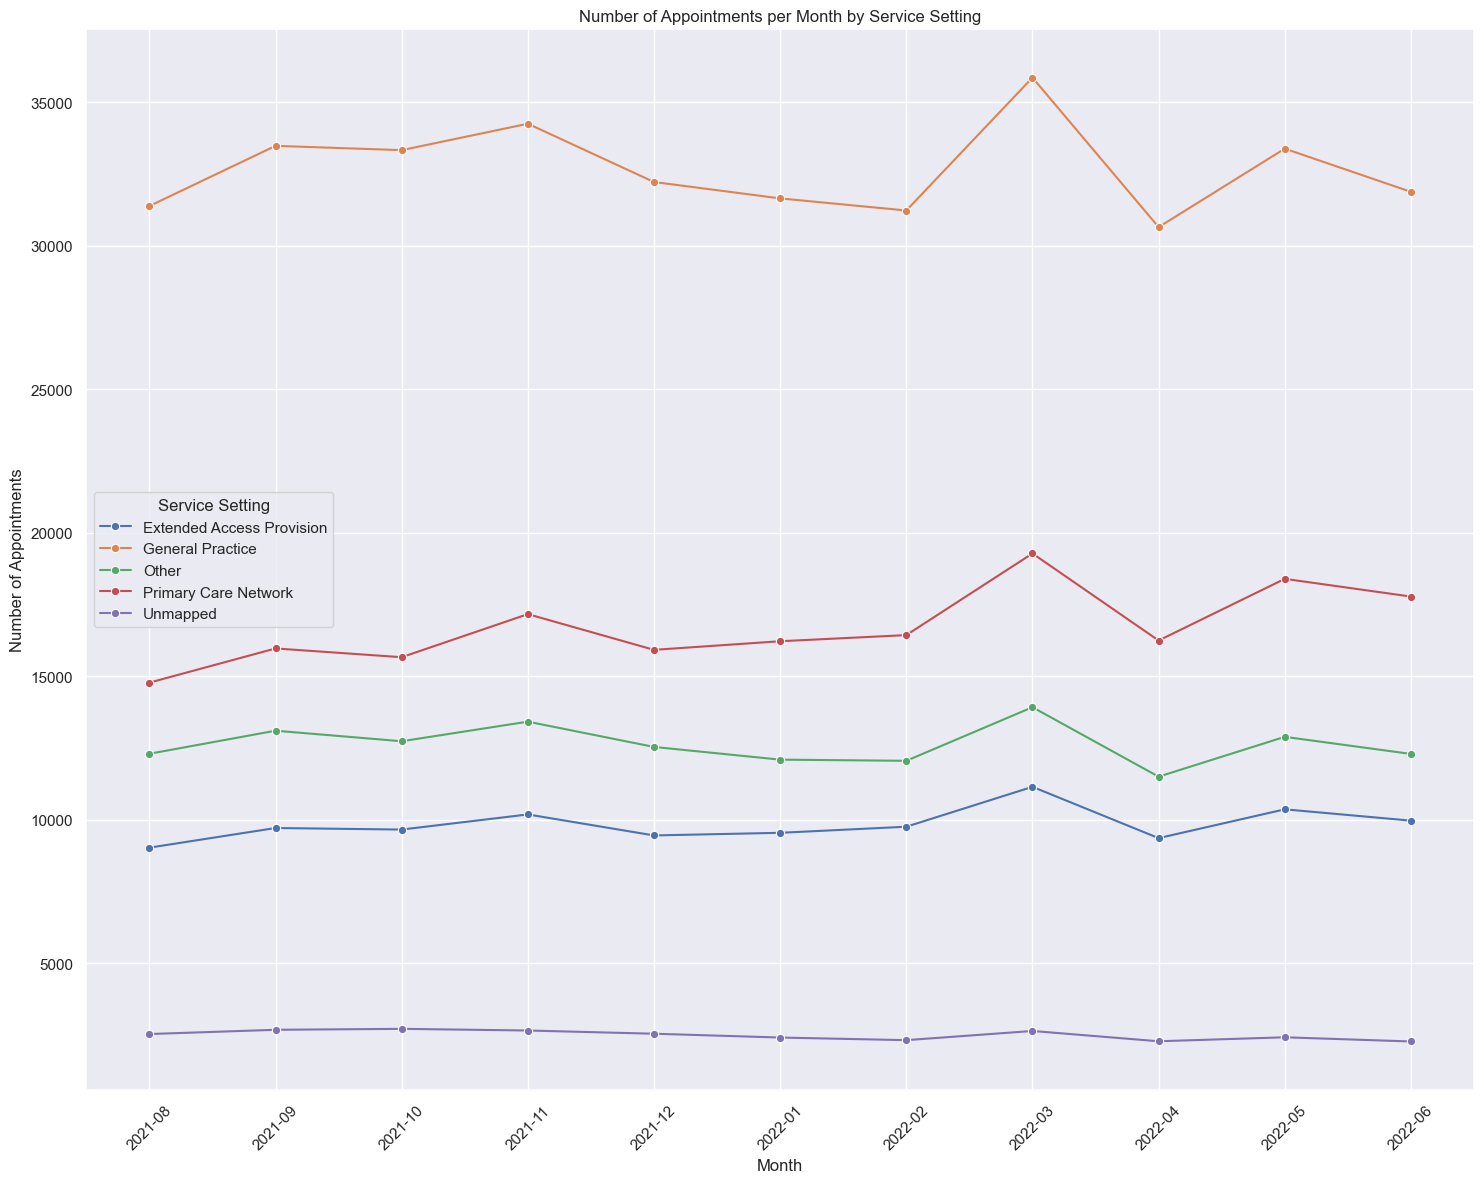

In [135]:
# Plot the appointments over the available date range, and review the service settings for months.


# Aggregate data by month and service_setting
service_monthly = (
    nc.groupby(['appointment_month', 'service_setting'])
      .size()
      .reset_index(name='num_appointments')
)

# Create a line plot
plt.figure(figsize=(15, 12))
sns.lineplot(
    data=service_monthly,
    x='appointment_month',
    y='num_appointments',
    hue='service_setting',
    marker='o'
)

# Formatting
plt.xticks(rotation=45)
plt.title('Number of Appointments per Month by Service Setting')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.legend(title='Service Setting')
plt.tight_layout()

# Save as PNG
plt.savefig("appointments_per_month_service_setting.png", dpi=300, bbox_inches="tight")

plt.show()

**Context types:**

In [138]:
# Create a separate data set that can be used in future weeks. 

# Create separate dataset for context types by month
if 'appointment_month' not in nc.columns:
    if 'appointment_date' in nc.columns:
        nc['appointment_month'] = pd.to_datetime(nc['appointment_date'], errors='coerce').dt.to_period('M')

context_monthly = (
    nc.groupby(['appointment_month', 'context_type'])
      .size()
      .reset_index(name='num_appointments')
)

# Sort by appointment_month
context_monthly['appointment_month'] = context_monthly['appointment_month'].astype(str)
context_monthly = context_monthly.sort_values('appointment_month')

# View output.
display(context_monthly.head(12))



,appointment_month,context_type,num_appointments
0,2021-08,Care Related Encounter,59604
1,2021-08,Inconsistent Mapping,7867
2,2021-08,Unmapped,2528
3,2021-09,Care Related Encounter,63830
4,2021-09,Inconsistent Mapping,8416
5,2021-09,Unmapped,2676
6,2021-10,Care Related Encounter,62937
7,2021-10,Inconsistent Mapping,8432
8,2021-10,Unmapped,2709
9,2021-11,Care Related Encounter,66452


<Figure size 1500x1200 with 0 Axes>

<Axes: xlabel='appointment_month', ylabel='num_appointments'>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '2021-08'),
  Text(1, 0, '2021-09'),
  Text(2, 0, '2021-10'),
  Text(3, 0, '2021-11'),
  Text(4, 0, '2021-12'),
  Text(5, 0, '2022-01'),
  Text(6, 0, '2022-02'),
  Text(7, 0, '2022-03'),
  Text(8, 0, '2022-04'),
  Text(9, 0, '2022-05'),
  Text(10, 0, '2022-06')])

Text(0.5, 1.0, 'Number of Appointments per Month by Context Type')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Appointments (Thousands)')

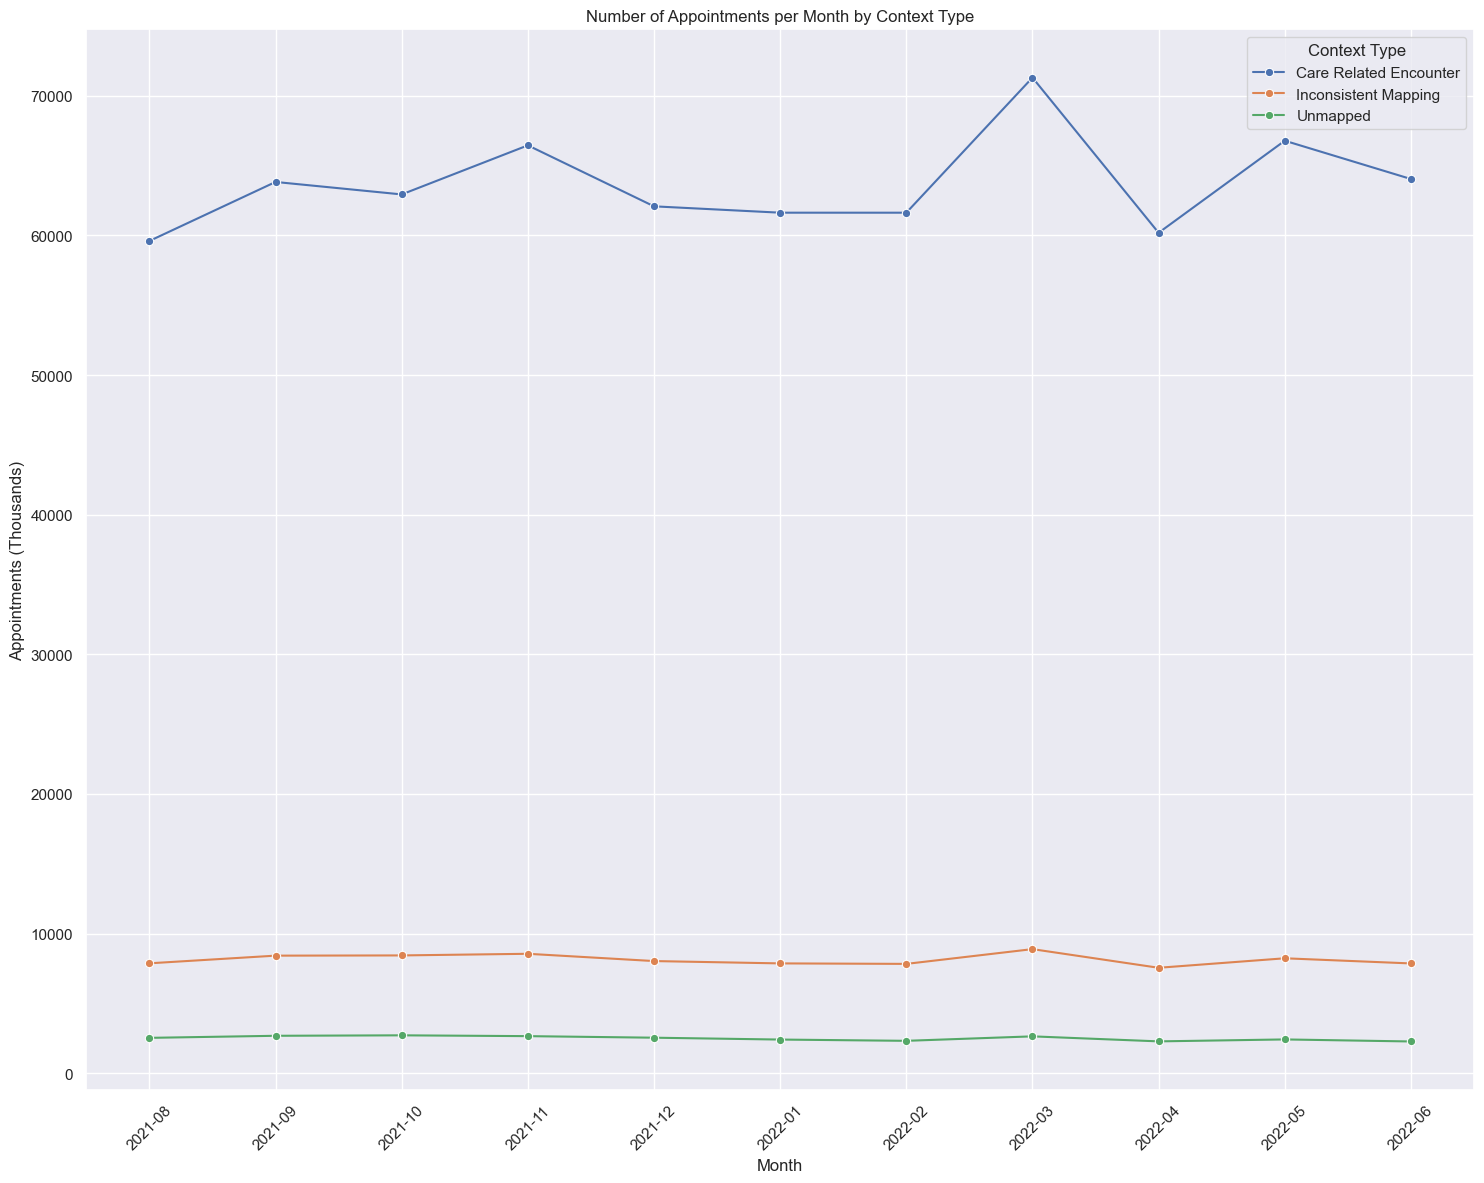

In [144]:
# Plot the appointments over the available date range, and review the context types for months.

# Plot
plt.figure(figsize=(15, 12))
sns.lineplot(
    data=context_monthly,
    x='appointment_month',
    y='num_appointments',
    hue='context_type',
    marker='o'
)

plt.xticks(rotation=45)
plt.title('Number of Appointments per Month by Context Type')
plt.xlabel('Month')
plt.ylabel('Appointments (Thousands)')
plt.legend(title='Context Type')
plt.tight_layout()


# Save as PNG
plt.savefig("appointments_per_month_context_type.png", dpi=300, bbox_inches="tight")

#View output.
plt.show()

**National categories:**

In [146]:
# Create a separate data set that can be used in future weeks. 

# Ensure month names
month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']

if 'appointment_month' in nc.columns:
    nc['appointment_month'] = pd.to_datetime(nc['appointment_month'], errors='coerce').dt.month_name().fillna(nc['appointment_month'])
elif 'appointment_date' in nc.columns:
    nc['appointment_month'] = pd.to_datetime(nc['appointment_date'], errors='coerce').dt.month_name()

nc['appointment_month'] = pd.Categorical(nc['appointment_month'], categories=month_order, ordered=True)

# Aggregate data
if 'count_of_appointments' in nc.columns:
    base = nc.groupby(['appointment_month','national_category'])['count_of_appointments'].sum().reset_index()
else:
    base = nc.groupby(['appointment_month','national_category']).size().reset_index(name='count_of_appointments')

# Top 5 + Others
top5 = base.groupby('national_category')['count_of_appointments'].sum().nlargest(5).index
base['category_group'] = base['national_category'].where(base['national_category'].isin(top5), 'Others')

# Final aggregated dataset
plotdf = base.groupby(['appointment_month','category_group'])['count_of_appointments'].sum().reset_index()

plotdf




,appointment_month,category_group,count_of_appointments
0,January,Clinical Triage,3777487
1,January,General Consultation Acute,4787643
2,January,General Consultation Routine,8645563
3,January,Inconsistent Mapping,2353965
4,January,Others,3741575
...,...,...,...
67,December,General Consultation Acute,4689373
68,December,General Consultation Routine,8123938
69,December,Inconsistent Mapping,2387907
70,December,Others,3998880


<Figure size 1500x800 with 0 Axes>

<Axes: xlabel='appointment_month', ylabel='count_of_appointments'>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

Text(0.5, 1.0, 'Monthly Appointments — Top 5 National Categories + Others')

Text(0, 0.5, 'Number of Appointments')

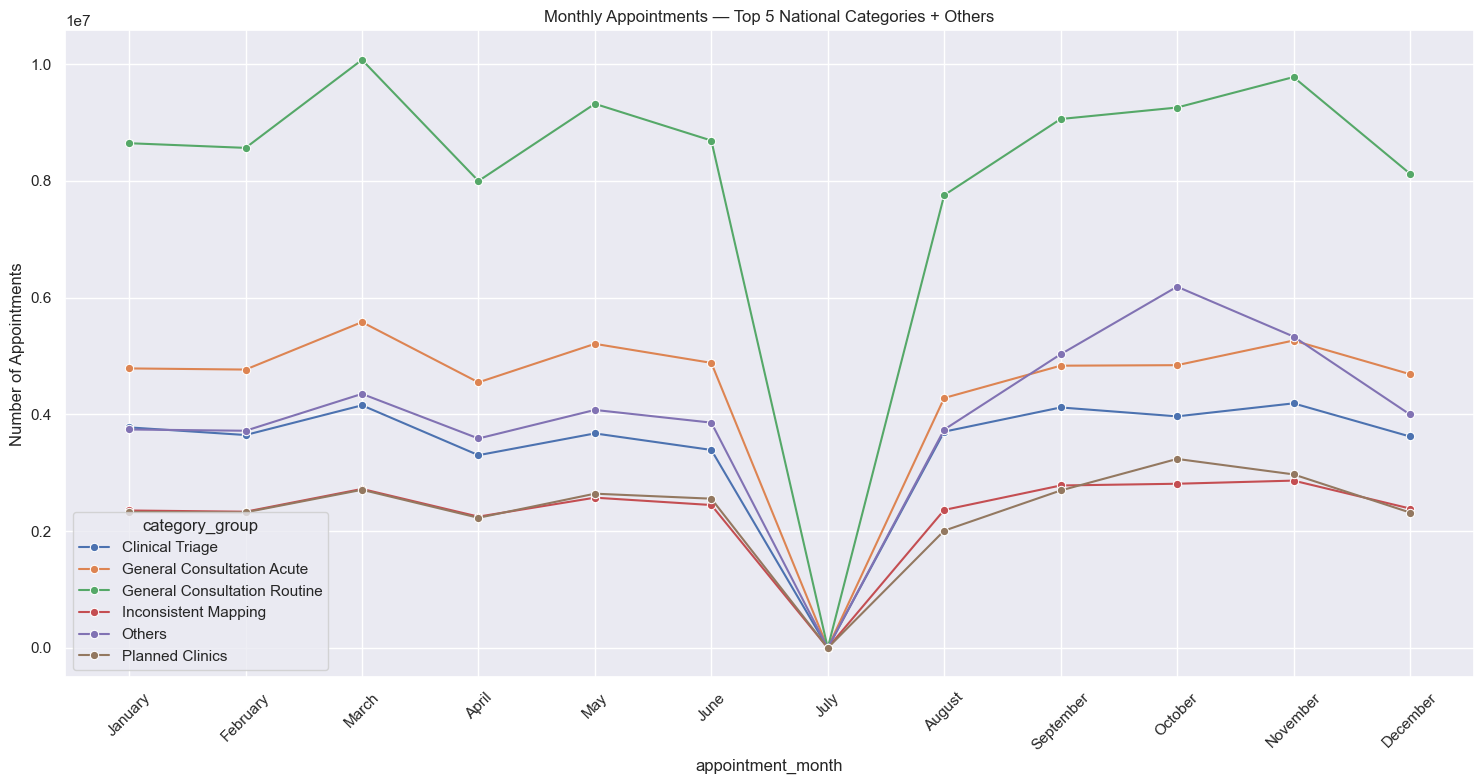

In [149]:
# Plot the appointments over the available date range, and review the national categories for months.

def human_format(num, pos):
    if num >= 1_000_000:
        return f'{num/1_000_000:.1f}M'
    elif num >= 1_000:
        return f'{num/1_000:.0f}K'
    else:
        return int(num)

plt.figure(figsize=(15, 8))
sns.lineplot(data=plotdf, x='appointment_month', y='count_of_appointments',
             hue='category_group', marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Appointments — Top 5 National Categories + Others')
plt.ylabel('Number of Appointments')


plt.tight_layout()


# Save as PNG
plt.savefig("top_five_national_categories_monthly.png", dpi=300, bbox_inches="tight")

plt.show()



### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (June to August 2021), autumn (September to November 2021), winter (December to February 2022), and spring (March to May 2022).

**Summer (June to August 2021):**

In [151]:
# Create a separate data set that can be used in future weeks. 


# Build a clean month column if needed ---
if 'appointment_month' not in nc.columns:
    nc['appointment_month'] = pd.to_datetime(nc['appointment_date'], errors='coerce').dt.month_name()

# Order months for plotting
month_order = ['June', 'July', 'August']  # summer window in order
nc['appointment_month'] = pd.Categorical(nc['appointment_month'], categories=month_order, ordered=True)

# Filter to Summer 2021 (June 1–Aug 31, 2021) ---
# Use appointment_date for precise filtering; fallback to month-name if needed
if 'appointment_date' in nc.columns:
    _dt = pd.to_datetime(nc['appointment_date'], errors='coerce')
    summer_base = nc[(_dt >= '2021-06-01') & (_dt <= '2021-08-31')].copy()
else:
    summer_base = nc[nc['appointment_month'].isin(month_order)].copy()

# Aggregate by month & service setting ---
if 'count_of_appointments' in summer_base.columns:
    summer_df = (summer_base.groupby(['appointment_month','service_setting'])['count_of_appointments']
                 .sum().reset_index(name='num_appointments'))
else:
    summer_df = (summer_base.groupby(['appointment_month','service_setting'])
                 .size().reset_index(name='num_appointments'))

# View output.
summer_df.sort_values(['appointment_month','service_setting']).reset_index(drop=True)




,appointment_month,service_setting,num_appointments
0,June,Extended Access Provision,0
1,June,General Practice,0
2,June,Other,0
3,June,Primary Care Network,0
4,June,Unmapped,0
5,July,Extended Access Provision,0
6,July,General Practice,0
7,July,Other,0
8,July,Primary Care Network,0
9,July,Unmapped,0


<Figure size 1500x1200 with 0 Axes>

Text(0, 0.5, 'Number of Appointments')

Text(0.5, 1.0, 'Appointments per Service Setting — Summer 2021')

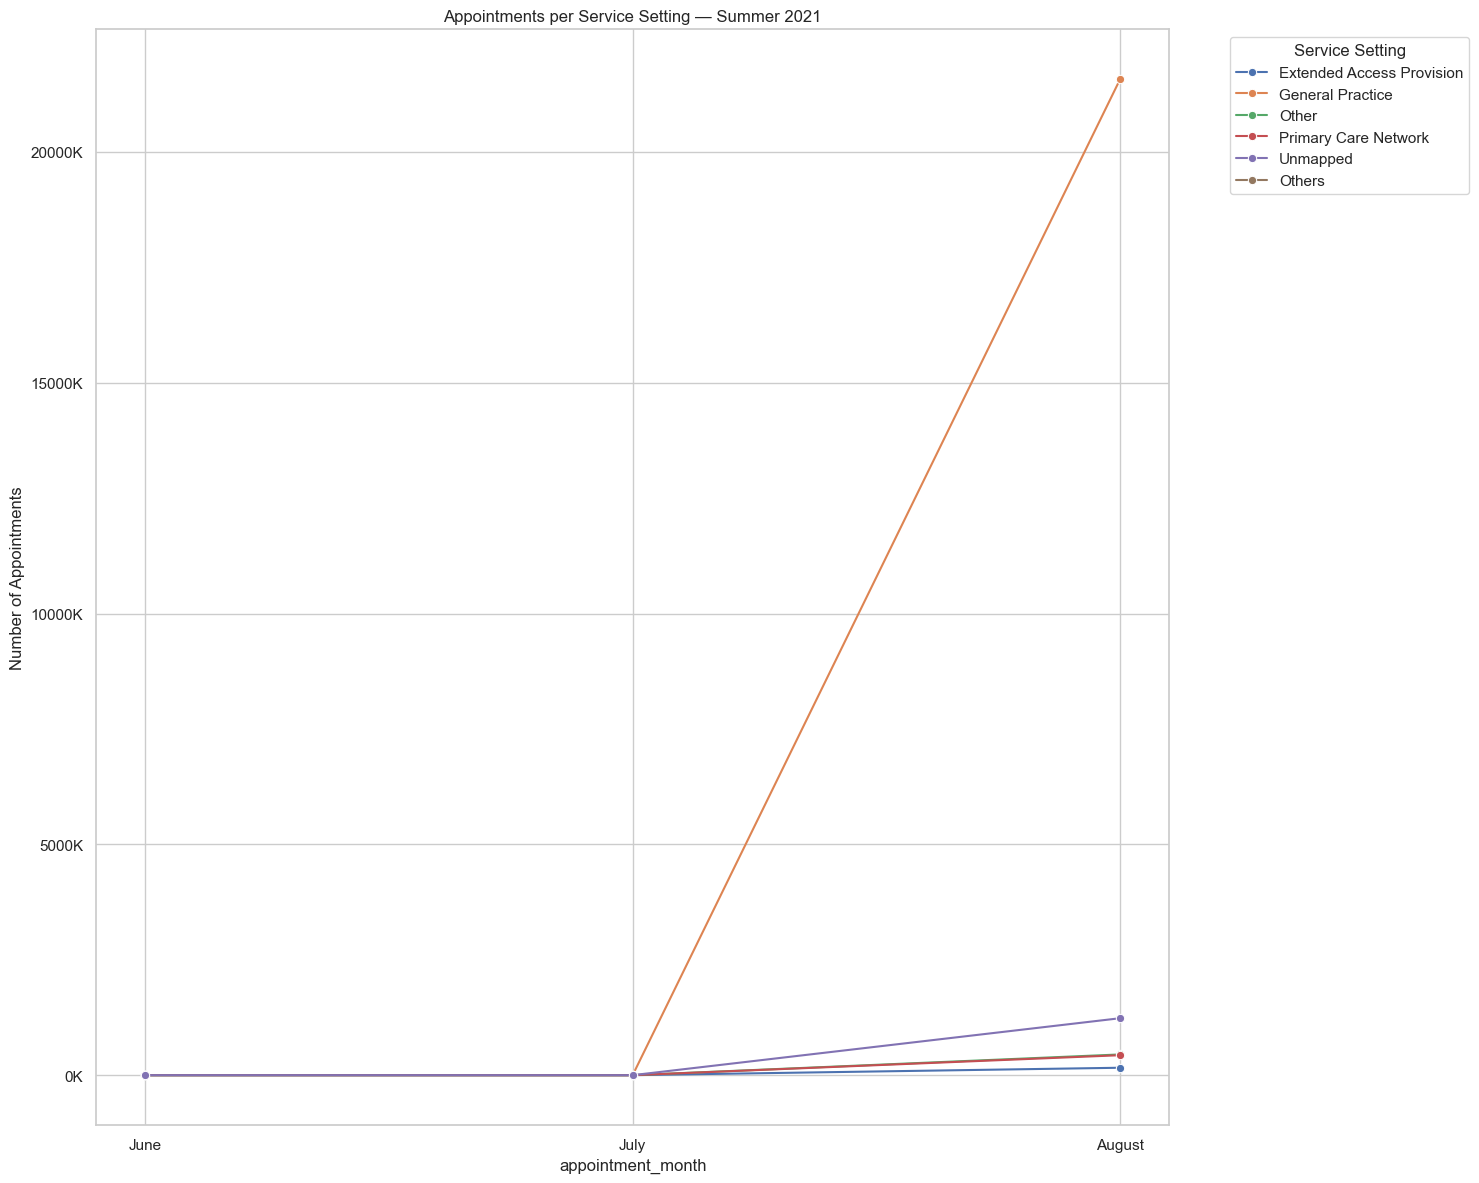

In [154]:
# Look at June to August 2021 in more detail to allow a closer look.

# Ensure "Others" is last in the dataframe order
summer_df['service_setting'] = summer_df['service_setting'].astype(str)
summer_df['service_setting'] = summer_df['service_setting'].apply(lambda x: "Others" if x.strip().lower() == "others" else x)

# Get unique categories and reorder so Others is last
categories = [cat for cat in summer_df['service_setting'].unique() if cat != "Others"]
categories.append("Others")
summer_df['service_setting'] = pd.Categorical(summer_df['service_setting'], categories=categories, ordered=True)

# Set style
sns.set_theme(style="whitegrid")

# Plot
plt.figure(figsize=(15,12))
ax = sns.lineplot(
    data=summer_df,
    x="appointment_month",
    y="num_appointments",
    hue="service_setting",
    marker="o"
)

# Format y-axis in thousands
ax.set_ylabel("Number of Appointments")
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x/1000)}K"))

# Move legend outside
ax.legend(title="Service Setting", bbox_to_anchor=(1.05, 1), loc='upper left')

# Title
ax.set_title("Appointments per Service Setting — Summer 2021")

plt.tight_layout()


# Save as PNG
plt.savefig("appointments_per_service_setting_summer.png", dpi=300, bbox_inches="tight")

plt.show()



**Autumn (September to November 2021):**

In [153]:
# Create a separate data set that can be used in future weeks. 

# Build a clean month column if needed ---
if 'appointment_month' not in nc.columns:
    nc['appointment_month'] = pd.to_datetime(nc['appointment_date'], errors='coerce').dt.month_name()

# Order months for plotting
month_order = ['September', 'October', 'November']  # autumn window in order
nc['appointment_month'] = pd.Categorical(nc['appointment_month'], categories=month_order, ordered=True)

# Filter to Autumn 2021 (Sep 1–Nov 30, 2021) ---
# Use appointment_date for precise filtering; fallback to month-name if needed
if 'appointment_date' in nc.columns:
    _dt = pd.to_datetime(nc['appointment_date'], errors='coerce')
    autumn_base = nc[(_dt >= '2021-09-01') & (_dt <= '2021-11-30')].copy()
else:
    autumn_base = nc[nc['appointment_month'].isin(month_order)].copy()

# Aggregate by month & service setting ---
if 'count_of_appointments' in autumn_base.columns:
    autumn_df = (
        autumn_base.groupby(['appointment_month', 'service_setting'])['count_of_appointments']
        .sum()
        .reset_index(name='num_appointments')
    )
else:
    autumn_df = (
        autumn_base.groupby(['appointment_month', 'service_setting'])
        .size()
        .reset_index(name='num_appointments')
    )

# View output.
autumn_df.sort_values(['appointment_month', 'service_setting']).reset_index(drop=True)


,appointment_month,service_setting,num_appointments
0,September,Extended Access Provision,0
1,September,General Practice,0
2,September,Other,0
3,September,Primary Care Network,0
4,September,Unmapped,0
5,October,Extended Access Provision,0
6,October,General Practice,0
7,October,Other,0
8,October,Primary Care Network,0
9,October,Unmapped,0


<Figure size 1500x1200 with 0 Axes>

Text(0, 0.5, 'Number of Appointments')

Text(0.5, 1.0, 'Appointments per Service Setting — Autumn 2021')

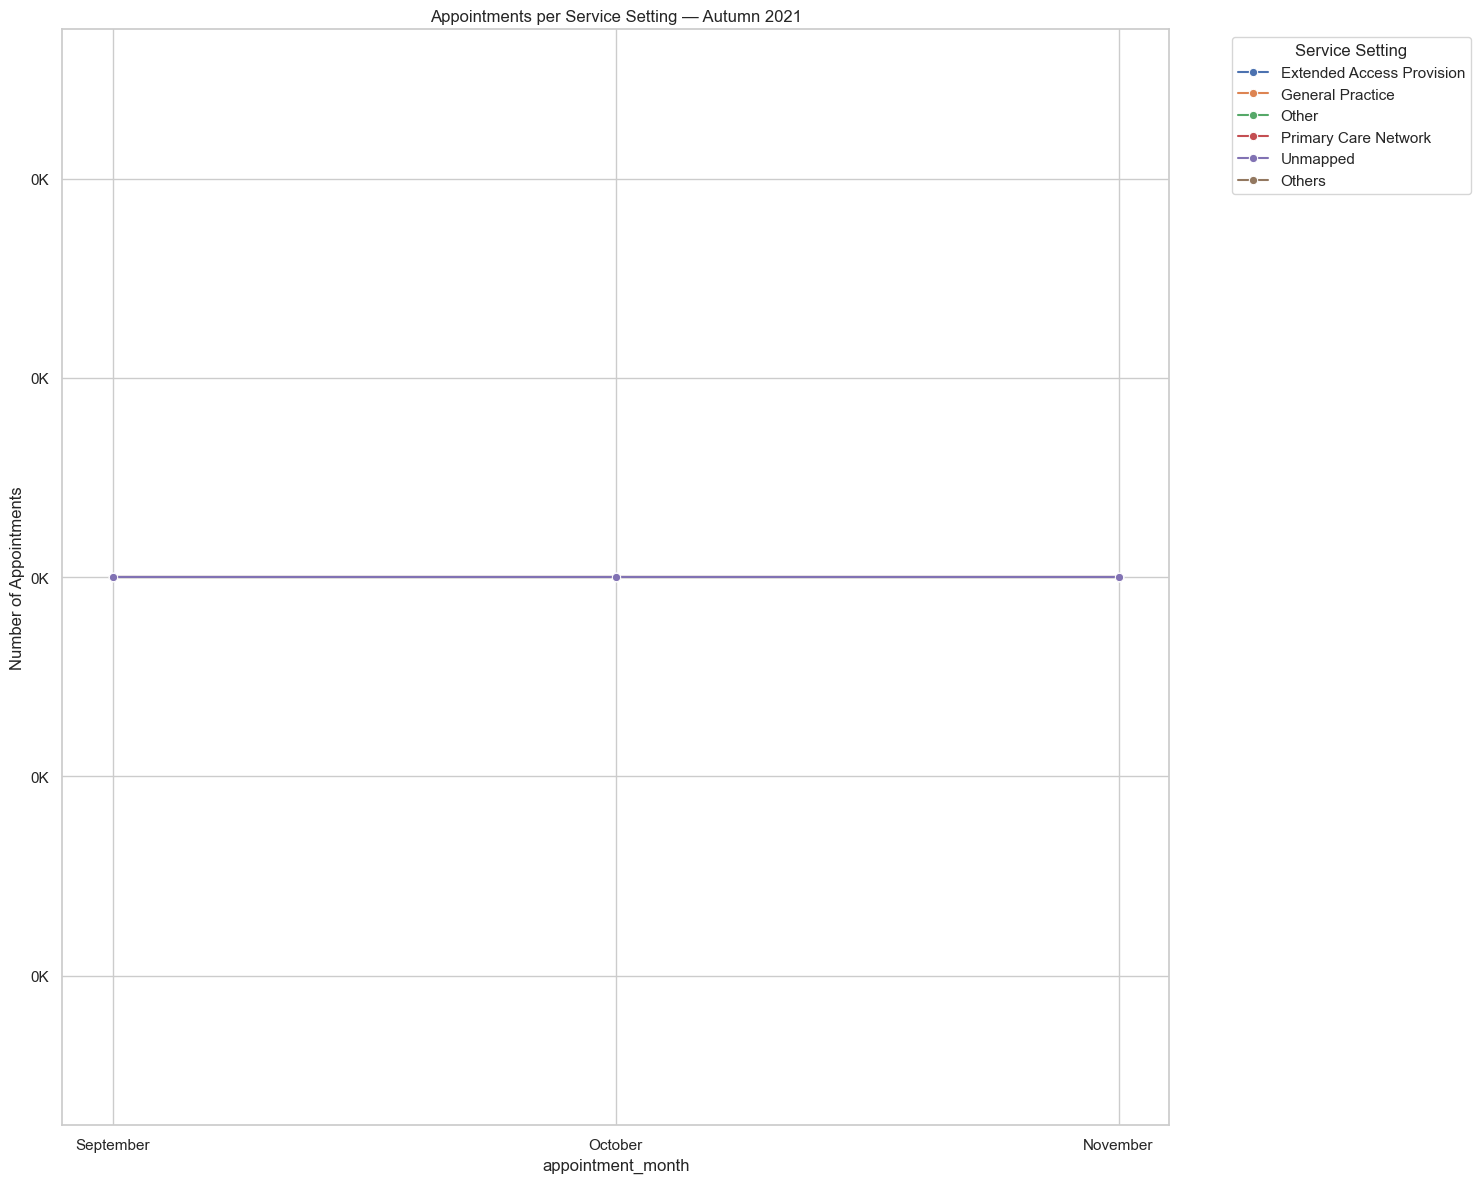

In [155]:
# Look at September to November 2021 in more detail to allow a closer look.

# Ensure "Others" is last in the dataframe order
autumn_df['service_setting'] = autumn_df['service_setting'].astype(str)
autumn_df['service_setting'] = autumn_df['service_setting'].apply(lambda x: "Others" if x.strip().lower() == "others" else x)

# Get unique categories and reorder so Others is last
categories = [cat for cat in autumn_df['service_setting'].unique() if cat != "Others"]
categories.append("Others")
autumn_df['service_setting'] = pd.Categorical(autumn_df['service_setting'], categories=categories, ordered=True)

# Set style
sns.set_theme(style="whitegrid")

# Plot
plt.figure(figsize=(15,12))
ax = sns.lineplot(
    data=autumn_df,
    x="appointment_month",
    y="num_appointments",
    hue="service_setting",
    marker="o"
)

# Format y-axis in thousands
ax.set_ylabel("Number of Appointments")
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x/1000)}K"))

# Move legend outside
ax.legend(title="Service Setting", bbox_to_anchor=(1.05, 1), loc='upper left')

# Title
ax.set_title("Appointments per Service Setting — Autumn 2021")

plt.tight_layout()


# Save as PNG
plt.savefig("appointments_per_service_setting_autumn.png", dpi=300, bbox_inches="tight")
plt.show()

**Winter (December to February 2022):**

In [156]:
# Create a separate data set that can be used in future weeks. 

# Build a clean month column if needed
if 'appointment_month' not in nc.columns:
    nc['appointment_month'] = pd.to_datetime(nc['appointment_date'], errors='coerce').dt.month_name()

# Order months for plotting
month_order = ['December', 'January', 'February']  # winter window in order
nc['appointment_month'] = pd.Categorical(nc['appointment_month'], categories=month_order, ordered=True)

# Filter to Winter 2021–2022 (Dec 1, 2021 – Feb 28, 2022) ---
if 'appointment_date' in nc.columns:
    _dt = pd.to_datetime(nc['appointment_date'], errors='coerce')
    winter_base = nc[(_dt >= '2021-12-01') & (_dt <= '2022-02-28')].copy()
else:
    winter_base = nc[nc['appointment_month'].isin(month_order)].copy()

# Aggregate by month & service setting ---
if 'count_of_appointments' in winter_base.columns:
    winter_df = (
        winter_base.groupby(['appointment_month', 'service_setting'])['count_of_appointments']
        .sum()
        .reset_index(name='num_appointments')
    )
else:
    winter_df = (
        winter_base.groupby(['appointment_month', 'service_setting'])
        .size()
        .reset_index(name='num_appointments')
    )

# View output.
winter_df.sort_values(['appointment_month', 'service_setting']).reset_index(drop=True)

,appointment_month,service_setting,num_appointments
0,December,Extended Access Provision,0
1,December,General Practice,0
2,December,Other,0
3,December,Primary Care Network,0
4,December,Unmapped,0
5,January,Extended Access Provision,0
6,January,General Practice,0
7,January,Other,0
8,January,Primary Care Network,0
9,January,Unmapped,0


<Figure size 1500x1200 with 0 Axes>

Text(0, 0.5, 'Number of Appointments')

Text(0.5, 1.0, 'Appointments per Service Setting — Winter 2021-2022')

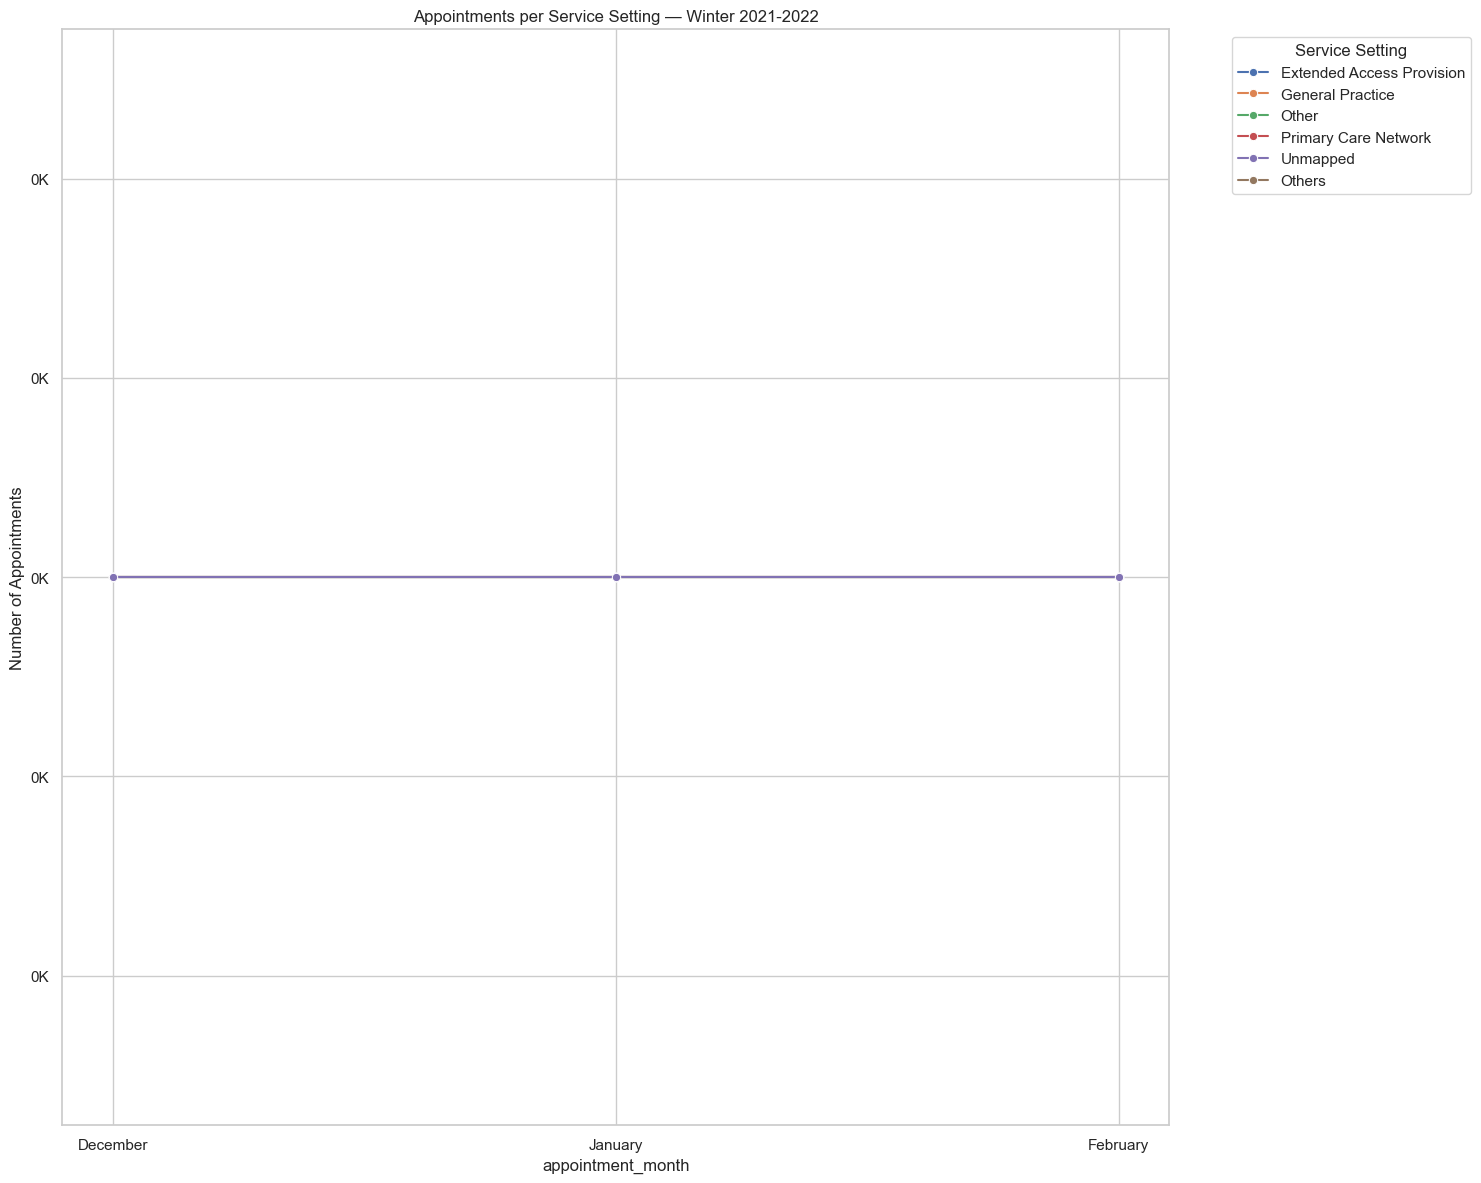

In [157]:

# Look at December 2021 to February 2022 in more detail to allow a closer look.

# Ensure "Others" is last in the dataframe order
winter_df['service_setting'] = winter_df['service_setting'].astype(str)
winter_df['service_setting'] = winter_df['service_setting'].apply(lambda x: "Others" if x.strip().lower() == "others" else x)

# Get unique categories and reorder so Others is last
categories = [cat for cat in winter_df['service_setting'].unique() if cat != "Others"]
categories.append("Others")
winter_df['service_setting'] = pd.Categorical(winter_df['service_setting'], categories=categories, ordered=True)

# Set style
sns.set_theme(style="whitegrid")

# Plot
plt.figure(figsize=(15,12))
ax = sns.lineplot(
    data=winter_df,
    x="appointment_month",
    y="num_appointments",
    hue="service_setting",
    marker="o"
)

# Format y-axis in thousands
ax.set_ylabel("Number of Appointments")
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x/1000)}K"))

# Move legend outside
ax.legend(title="Service Setting", bbox_to_anchor=(1.05, 1), loc='upper left')

# Title
ax.set_title("Appointments per Service Setting — Winter 2021-2022")

plt.tight_layout()


# Save as PNG
plt.savefig("appointments_per_service_setting_winter.png", dpi=300, bbox_inches="tight")
plt.show()


**Spring (March to May 2022):**

In [158]:
# Create a separate data set that can be used in future weeks. 

# Build a clean month column if needed
if 'appointment_month' not in nc.columns:
    nc['appointment_month'] = pd.to_datetime(nc['appointment_date'], errors='coerce').dt.month_name()

# Order months for plotting
month_order = ['March', 'April', 'May']  # spring window in order
nc['appointment_month'] = pd.Categorical(nc['appointment_month'], categories=month_order, ordered=True)

# Filter to Spring 2022 (Mar 1 – May 31, 2022) ---
if 'appointment_date' in nc.columns:
    _dt = pd.to_datetime(nc['appointment_date'], errors='coerce')
    spring_base = nc[(_dt >= '2022-03-01') & (_dt <= '2022-05-31')].copy()
else:
    spring_base = nc[nc['appointment_month'].isin(month_order)].copy()

# Aggregate by month & service setting ---
if 'count_of_appointments' in spring_base.columns:
    spring_df = (
        spring_base.groupby(['appointment_month', 'service_setting'])['count_of_appointments']
        .sum()
        .reset_index(name='num_appointments')
    )
else:
    spring_df = (
        spring_base.groupby(['appointment_month', 'service_setting'])
        .size()
        .reset_index(name='num_appointments')
    )

# View output.
spring_df.sort_values(['appointment_month', 'service_setting']).reset_index(drop=True)



,appointment_month,service_setting,num_appointments
0,March,Extended Access Provision,0
1,March,General Practice,0
2,March,Other,0
3,March,Primary Care Network,0
4,March,Unmapped,0
5,April,Extended Access Provision,0
6,April,General Practice,0
7,April,Other,0
8,April,Primary Care Network,0
9,April,Unmapped,0


<Figure size 1500x1200 with 0 Axes>

Text(0, 0.5, 'Number of Appointments')

Text(0.5, 1.0, 'Appointments per Service Setting — Spring 2022')

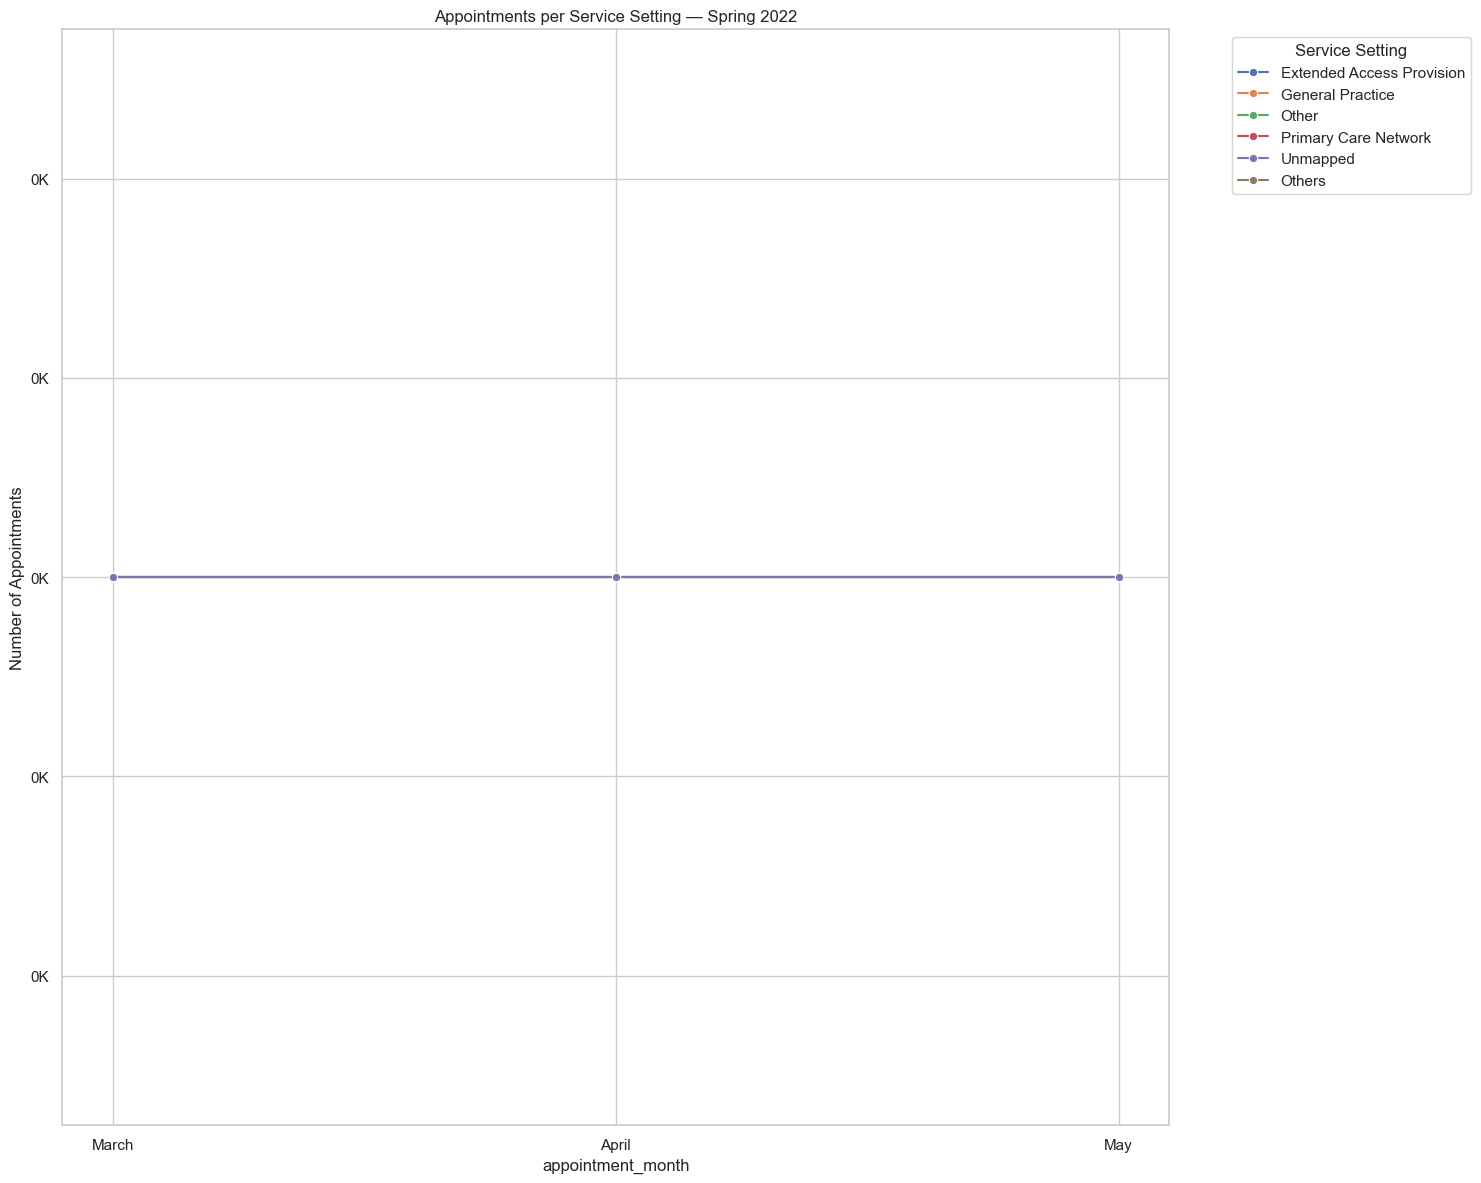

In [159]:

# Look at March to May 2022 in more detail to allow a closer look.

# Ensure "Others" is last in the dataframe order
spring_df['service_setting'] = spring_df['service_setting'].astype(str)
spring_df['service_setting'] = spring_df['service_setting'].apply(lambda x: "Others" if x.strip().lower() == "others" else x)

# Get unique categories and reorder so Others is last
categories = [cat for cat in spring_df['service_setting'].unique() if cat != "Others"]
categories.append("Others")
spring_df['service_setting'] = pd.Categorical(spring_df['service_setting'], categories=categories, ordered=True)

# Set style
sns.set_theme(style="whitegrid")

# Plot
plt.figure(figsize=(15,12))
ax = sns.lineplot(
    data=spring_df,
    x="appointment_month",
    y="num_appointments",
    hue="service_setting",
    marker="o"
)

# Format y-axis in thousands
ax.set_ylabel("Number of Appointments")
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x/1000)}K"))

# Move legend outside
ax.legend(title="Service Setting", bbox_to_anchor=(1.05, 1), loc='upper left')

# Title
ax.set_title("Appointments per Service Setting — Spring 2022")

plt.tight_layout()


# Save as PNG
plt.savefig("appointments_per_service_setting_spring.png", dpi=300, bbox_inches="tight")
plt.show()



In [160]:
#sense check for dataframes summer_df, autumn_df, winter_df, and spring_df

for name, df in [("Summer", summer_df), ("Autumn", autumn_df), ("Winter", winter_df), ("Spring", spring_df)]:
    print(f"--- {name} ---")
    print("Rows:", df.shape[0] if df is not None else "No DataFrame")
    print("Total Appointments:", df['num_appointments'].sum() if 'num_appointments' in df.columns else "No column")
    print("Months:", df['appointment_month'].unique() if 'appointment_month' in df.columns else "No column")
    print()

--- Summer ---
Rows: 15
Total Appointments: 23852171
Months: ['June', 'July', 'August']
Categories (3, object): ['June' < 'July' < 'August']

--- Autumn ---
Rows: 15
Total Appointments: 0
Months: ['September', 'October', 'November']
Categories (3, object): ['September' < 'October' < 'November']

--- Winter ---
Rows: 15
Total Appointments: 0
Months: ['December', 'January', 'February']
Categories (3, object): ['December' < 'January' < 'February']

--- Spring ---
Rows: 15
Total Appointments: 0
Months: ['March', 'April', 'May']
Categories (3, object): ['March' < 'April' < 'May']



# Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [161]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [162]:
# Load the data set.
# Load tweets dataset
tweets = pd.read_csv("tweets.csv")

# View the data frame.
print(tweets.shape)
print(tweets.columns)
tweets.head(3)


(1174, 10)
Index(['tweet_id', 'tweet_full_text', 'tweet_entities',
       'tweet_entities_hashtags', 'tweet_metadata', 'tweet_retweet_count',
       'tweet_favorite_count', 'tweet_favorited', 'tweet_retweeted',
       'tweet_lang'],
      dtype='object')


,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en


In [163]:
# Explore the metadata.

# General summary of the dataset
print("\nMetadata Summary:")
tweets.info()



Metadata Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [164]:
# Explore the data set.
# Basic shape of the dataset (rows, columns)
print("Shape:", tweets.shape)

# General summary of the dataset
print("\nMetadata Summary:")
tweets.info()

# First few rows to see data structure
print("\nFirst 5 rows:")
display(tweets.head())

# Quick descriptive stats (works for numeric and date columns)
print("\nDescriptive Statistics:")
display(tweets.describe(include='all'))

Shape: (1174, 10)

Metadata Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB

First 5 rows:


,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en



Descriptive Statistics:


,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
count,1.174000e+03,1174,1174,1007,1174,1174.000000,1174.00000,1174,1174,1174
unique,NaN,961,945,710,1,NaN,NaN,1,1,1
top,NaN,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'khaleejtimes', 'name': 'Khaleej Times', 'id': 18860860, 'id_str': '18860860', 'indices': [3, 16]}, {'screen_name': 'BurjeelHoldin...",#healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",NaN,NaN,False,False,en
freq,NaN,15,15,88,1174,NaN,NaN,1174,1174,1174
mean,1.567612e+18,NaN,NaN,NaN,NaN,8.629472,0.37138,NaN,NaN,NaN
std,2.427553e+13,NaN,NaN,NaN,NaN,29.784675,2.04470,NaN,NaN,NaN
min,1.567574e+18,NaN,NaN,NaN,NaN,0.000000,0.00000,NaN,NaN,NaN
25%,1.567590e+18,NaN,NaN,NaN,NaN,0.000000,0.00000,NaN,NaN,NaN
50%,1.567611e+18,NaN,NaN,NaN,NaN,1.000000,0.00000,NaN,NaN,NaN
75%,1.567633e+18,NaN,NaN,NaN,NaN,3.000000,0.00000,NaN,NaN,NaN


In [165]:
# Create a new DataFrame containing only the text.
tweets_text_df = tweets[['tweet_full_text']].copy()

# View the DataFrame
tweets_text_df.head()


,tweet_full_text
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be..."
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di..."


In [166]:
# Loop through the messages, and create a list of values containing the # symbol.

import re

# Extract only the hashtags from each tweet
hashtags_only = []
for msg in tweets['tweet_full_text']:
    hashtags = re.findall(r"#\w+", msg)  # Find all words starting with #
    hashtags_only.extend(hashtags)       # Add them to the list



In [167]:
# Display the first 30 records.

hashtags_only[:30]

['#Healthcare',
 '#PremiseHealth',
 '#hiring',
 '#Healthcare',
 '#NEW',
 '#blogs',
 '#digitaltransformation',
 '#cybersecurity',
 '#accounting',
 '#finance',
 '#healthcare',
 '#firstcoastcna',
 '#cnaexam',
 '#cnaexampreparation',
 '#jacksonville',
 '#cnatraining',
 '#nurse',
 '#nursing',
 '#nurselife',
 '#nursepractitioner',
 '#nurseproblems',
 '#nursingschool',
 '#healthcare',
 '#NEW',
 '#disparities',
 '#healthcare',
 '#alert',
 '#insurance',
 '#data',
 '#Healthcare']

In [168]:
from collections import Counter
import re

# Extract hashtags from tweets
hashtags_only = []
for msg in tweets['tweet_full_text']:
    hashtags = re.findall(r"#\w+", msg)  # Find all hashtags
    hashtags_only.extend(hashtags)

# Count most common hashtags
hashtag_counts = Counter(hashtags_only)

# Show top 10
hashtag_counts.most_common(10)

[('#healthcare', 599),
 ('#Healthcare', 198),
 ('#health', 70),
 ('#HealthCare', 47),
 ('#AI', 45),
 ('#medicine', 42),
 ('#job', 38),
 ('#strategy', 31),
 ('#medical', 30),
 ('#MedTwitter', 25)]

In [169]:
# Convert the series to a DataFrame in preparation for visualisation.
#Rename the columns


# Convert the Counter result to a DataFrame
hashtags_df = pd.DataFrame(hashtag_counts.items(), columns=['hashtag', 'count'])

# View the DataFrame
hashtags_df.head()


,hashtag,count
0,#Healthcare,198
1,#PremiseHealth,5
2,#hiring,18
3,#NEW,13
4,#blogs,1


In [170]:
# Fix the count datatype
hashtags_df['count'] = hashtags_df['count'].astype(int)


# View the result
hashtags_df.head()


,hashtag,count
0,#Healthcare,198
1,#PremiseHealth,5
2,#hiring,18
3,#NEW,13
4,#blogs,1


In [171]:
# Display records where the count is larger than 10.

hashtags_df[hashtags_df['count'] > 10]


,hashtag,count
0,#Healthcare,198
2,#hiring,18
3,#NEW,13
9,#healthcare,599
28,#job,38
32,#AI,45
44,#telehealth,14
69,#telemedicine,12
77,#coronavirus,16
79,#health,70


In [172]:

# Create a Seaborn barplot indicating records with a count > 10 records.

import re
from collections import Counter

# 1) Extract hashtags safely from the tweet text column
texts = tweets['tweet_full_text'].dropna().astype(str).tolist()

# Regex: words starting with # (letters/digits/underscore); UNICODE safe
pattern = re.compile(r'#\w+', flags=re.UNICODE)

# Flatten: get all hashtags from all tweets, normalized to lowercase
hashtags_list = [h.lower() for t in texts for h in pattern.findall(t)]

print(f"Tweets scanned: {len(texts)} | Hashtags found: {len(hashtags_list)} | "
      f"Unique hashtags: {len(set(hashtags_list))}")

# 2) Count and build the DataFrame
counts = Counter(hashtags_list)
hashtags_df = (
    pd.DataFrame(counts.items(), columns=['hashtag', 'count'])
    .sort_values('count', ascending=False)
    .reset_index(drop=True)
)

# Show top 20 before filtering to verify we have data
display(hashtags_df.head(20))

# 3) Apply the >10 filter (reduce the threshold if this empties the table)
THRESHOLD = 10
hashtags_df = hashtags_df[hashtags_df['count'] > THRESHOLD].reset_index(drop=True)

print(f"Rows after filter (> {THRESHOLD}): {len(hashtags_df)}")
display(hashtags_df.head(20))


Tweets scanned: 1174 | Hashtags found: 4378 | Unique hashtags: 1559


,hashtag,count
0,#healthcare,844
1,#health,88
2,#ai,47
3,#medicine,42
4,#job,38
5,#medical,35
6,#strategy,31
7,#digitalhealth,31
8,#pharmaceutical,28
9,#medtwitter,27


Rows after filter (> 10): 50


,hashtag,count
0,#healthcare,844
1,#health,88
2,#ai,47
3,#medicine,42
4,#job,38
5,#medical,35
6,#strategy,31
7,#digitalhealth,31
8,#pharmaceutical,28
9,#medtwitter,27


<Figure size 1500x1200 with 0 Axes>

Text(0.5, 1.0, 'Most Common Hashtags (Count > 10)')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Hashtag')

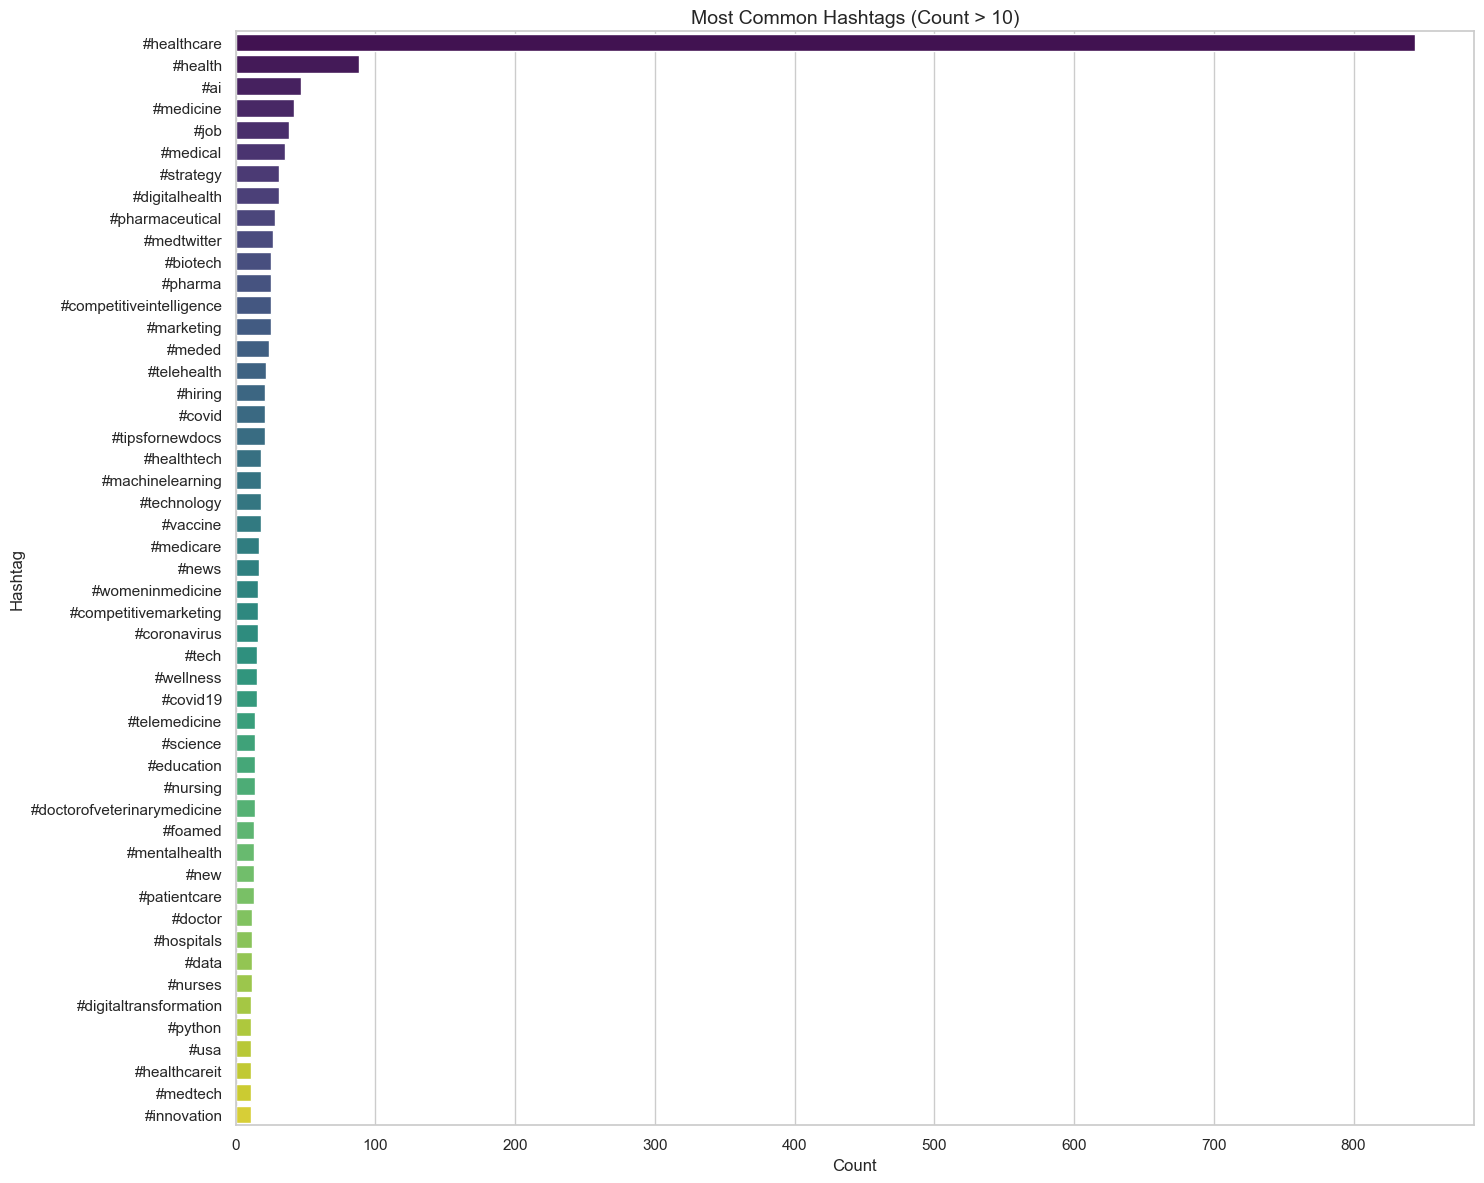

In [174]:

# Create the plot.

# Preserve the current sorted order in the plot
order = hashtags_df['hashtag'].tolist()

plt.figure(figsize=(15, 12))
sns.set_theme(style="whitegrid")
ax = sns.barplot(
    data=hashtags_df,
    x='count',
    y='hashtag',
    order=order,          # use the sorted order from Cell 1
    palette='viridis'
)

# Labels & title
ax.set_title("Most Common Hashtags (Count > 10)", fontsize=14)
ax.set_xlabel("Count", fontsize=12)
ax.set_ylabel("Hashtag", fontsize=12)


plt.tight_layout()


# Save as PNG
plt.savefig("most_common_hashtags", dpi=300, bbox_inches="tight")

# View the barplot
plt.show()

# 

# Assignment activity 6

### Make recommendations to the NHS. 

In [184]:
# Prepare your workstation.
import pandas as pd

# Load the appointments_regional.csv file.
appointments_df = pd.read_csv("appointments_regional.csv")

# View the DataFrame.
appointments_df.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [185]:
# Print the min and max dates.

# Convert month column to datetime and print min/max.
appointments_df['appointment_month'] = pd.to_datetime(
    appointments_df['appointment_month'], errors='coerce'
)

print("Earliest month:", appointments_df['appointment_month'].min())
print("Latest month:",  appointments_df['appointment_month'].max())



Earliest month: 2020-01-01 00:00:00
Latest month: 2022-06-01 00:00:00


In [186]:
# Filter the data set to only look at data from 2021-08 onwards.

# Keep rows from August 2021 and later.
filtered_df = appointments_df[
    appointments_df['appointment_month'] >= pd.Timestamp('2021-08-01')
].copy()

# Quick peek
filtered_df.head()


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,E54000034,2021-08-01,Attended,GP,Face-to-Face,1 Day,6553
3653,E54000034,2021-08-01,Attended,GP,Face-to-Face,15 to 21 Days,2390
3654,E54000034,2021-08-01,Attended,GP,Face-to-Face,2 to 7 Days,10547
3655,E54000034,2021-08-01,Attended,GP,Face-to-Face,22 to 28 Days,937
3656,E54000034,2021-08-01,Attended,GP,Face-to-Face,8 to 14 Days,4961


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [187]:
# Create an aggregated data set to review the different features.

# Use filtered_df if you created it earlier; otherwise use the full DataFrame
base = filtered_df.copy() if 'filtered_df' in globals() else appointments_df.copy()

# Ensure month is datetime
base['appointment_month'] = pd.to_datetime(base['appointment_month'], errors='coerce')

# Aggregate by month ONLY (works with this file)
agg_features = (
    base
    .groupby('appointment_month', as_index=False)['count_of_appointments']
    .sum()
    .rename(columns={'count_of_appointments': 'monthly_appointments'})
    .sort_values('appointment_month')
)

# View the DataFrame
agg_features.head()



,appointment_month,monthly_appointments
0,2021-08-01,23852171
1,2021-09-01,28522501
2,2021-10-01,30303834
3,2021-11-01,30405070
4,2021-12-01,25140776


In [188]:
# Determine the total number of appointments per month.
monthly_totals = agg_features.copy()


# Add a new column to indicate the average utilisation of services (proxy).
# Monthly aggregate / 30 to get an approximate daily value.
monthly_totals['avg_daily_appointments'] = (monthly_totals['monthly_appointments'] / 30).round(1)


# View the DataFrame.
monthly_totals.head()

,appointment_month,monthly_appointments,avg_daily_appointments
0,2021-08-01,23852171,795072.4
1,2021-09-01,28522501,950750.0
2,2021-10-01,30303834,1010127.8
3,2021-11-01,30405070,1013502.3
4,2021-12-01,25140776,838025.9


<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Total Appointments per Month')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Appointments (K)')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '2021-08'),
  Text(1, 0, '2021-09'),
  Text(2, 0, '2021-10'),
  Text(3, 0, '2021-11'),
  Text(4, 0, '2021-12'),
  Text(5, 0, '2022-01'),
  Text(6, 0, '2022-02'),
  Text(7, 0, '2022-03'),
  Text(8, 0, '2022-04'),
  Text(9, 0, '2022-05'),
  Text(10, 0, '2022-06')])

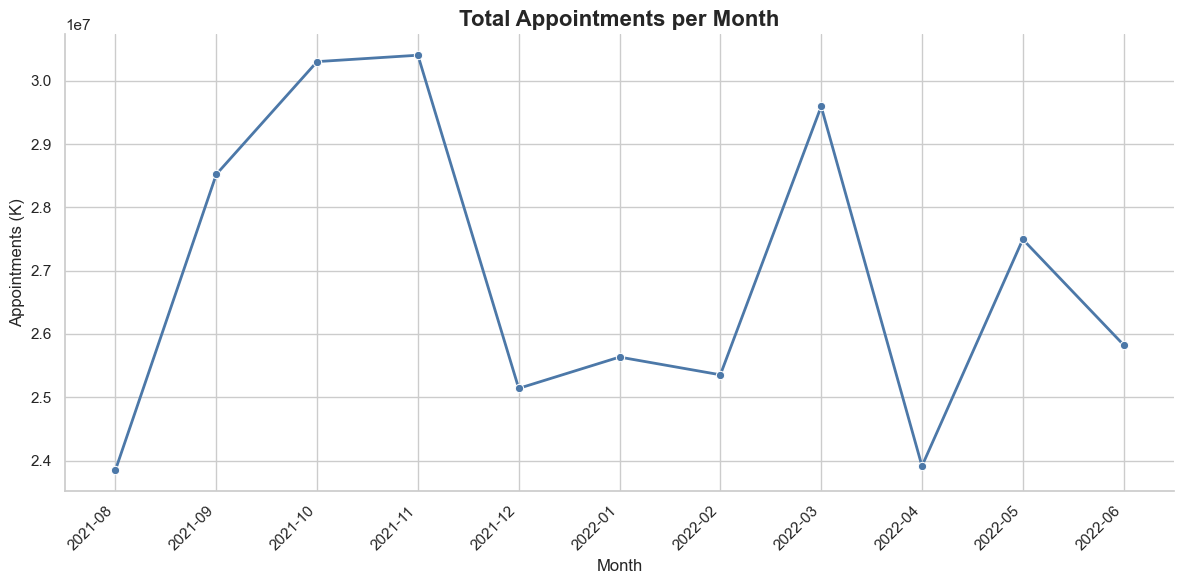

In [191]:
# Prep data
plot_mt = monthly_totals.copy()
plot_mt['month_label'] = plot_mt['appointment_month'].dt.strftime('%Y-%m')

# Lineplot modification
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    data=plot_mt,
    x='month_label',
    y='monthly_appointments',
    marker='o',
    linewidth=2,
    markersize=6,
    color="#4C78A8"
)

# Labels & title
ax.set_title("Total Appointments per Month", fontsize=16, weight="bold")
ax.set_xlabel("Month")
ax.set_ylabel("Appointments (K)")


# Keep it neat
sns.despine()
plt.xticks(rotation=45, ha="right")
plt.tight_layout()


# Save as PNG
plt.savefig("total_appointments_per_month_e.png", dpi=300, bbox_inches="tight")
plt.show()


<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Utilisation Rate per Month')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Utilisation Rate (%)')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '2021-08'),
  Text(1, 0, '2021-09'),
  Text(2, 0, '2021-10'),
  Text(3, 0, '2021-11'),
  Text(4, 0, '2021-12'),
  Text(5, 0, '2022-01'),
  Text(6, 0, '2022-02'),
  Text(7, 0, '2022-03'),
  Text(8, 0, '2022-04'),
  Text(9, 0, '2022-05'),
  Text(10, 0, '2022-06')])

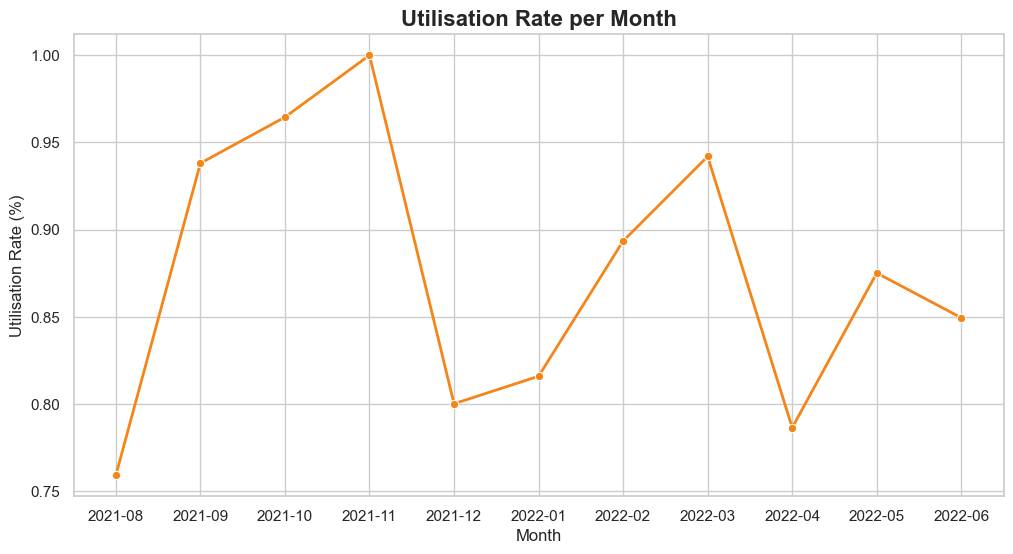

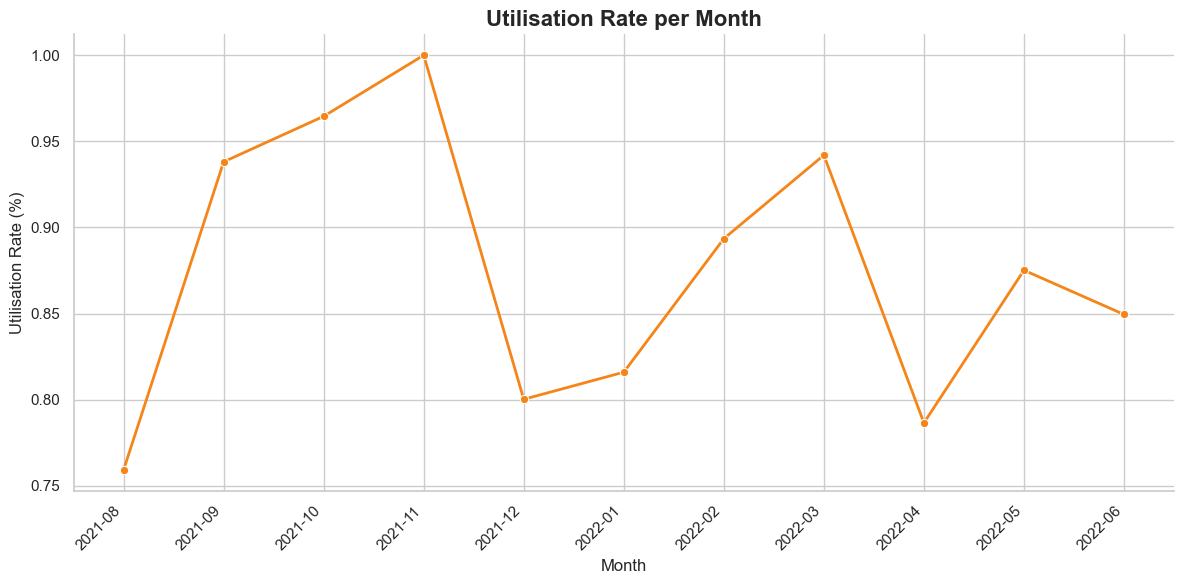

In [193]:
# Automatically determine capacity_per_day
if 'capacity_per_day' in monthly_totals.columns:
    capacity_per_day = monthly_totals['capacity_per_day'].max()
else:
    # Infer from the maximum average daily appointments
    monthly_totals['days_in_month'] = monthly_totals['appointment_month'].dt.days_in_month
    monthly_totals['avg_daily_appointments'] = monthly_totals['monthly_appointments'] / monthly_totals['days_in_month']
    capacity_per_day = monthly_totals['avg_daily_appointments'].max()

# Calculate utilisation rate
monthly_totals['utilisation_rate'] = (
    monthly_totals['monthly_appointments'] / (capacity_per_day * monthly_totals['days_in_month'])
)

# Prepare data for plotting
plot_ut = monthly_totals.copy()
plot_ut['month_label'] = plot_ut['appointment_month'].dt.strftime('%Y-%m')

# Plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    data=plot_ut,
    x='month_label',
    y='utilisation_rate',
    marker='o',
    linewidth=2,
    markersize=6,
    color="#F58518"
)

# Labels and title
ax.set_title("Utilisation Rate per Month", fontsize=16, weight="bold")
ax.set_xlabel("Month")
ax.set_ylabel("Utilisation Rate (%)")


sns.despine()
plt.xticks(rotation=45, ha="right")
plt.tight_layout()


plt.show()


**Question 2:** How do the healthcare professional types differ over time?

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Healthcare Professional Types Over Time — Share of Monthly Appointments')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Share of Appointments (%)')

(array([18262., 18353., 18444., 18536., 18628., 18718., 18809., 18901.,
        18993., 19083., 19174.]),
 [Text(18262.0, 0, '2020-01'),
  Text(18353.0, 0, '2020-04'),
  Text(18444.0, 0, '2020-07'),
  Text(18536.0, 0, '2020-10'),
  Text(18628.0, 0, '2021-01'),
  Text(18718.0, 0, '2021-04'),
  Text(18809.0, 0, '2021-07'),
  Text(18901.0, 0, '2021-10'),
  Text(18993.0, 0, '2022-01'),
  Text(19083.0, 0, '2022-04'),
  Text(19174.0, 0, '2022-07')])

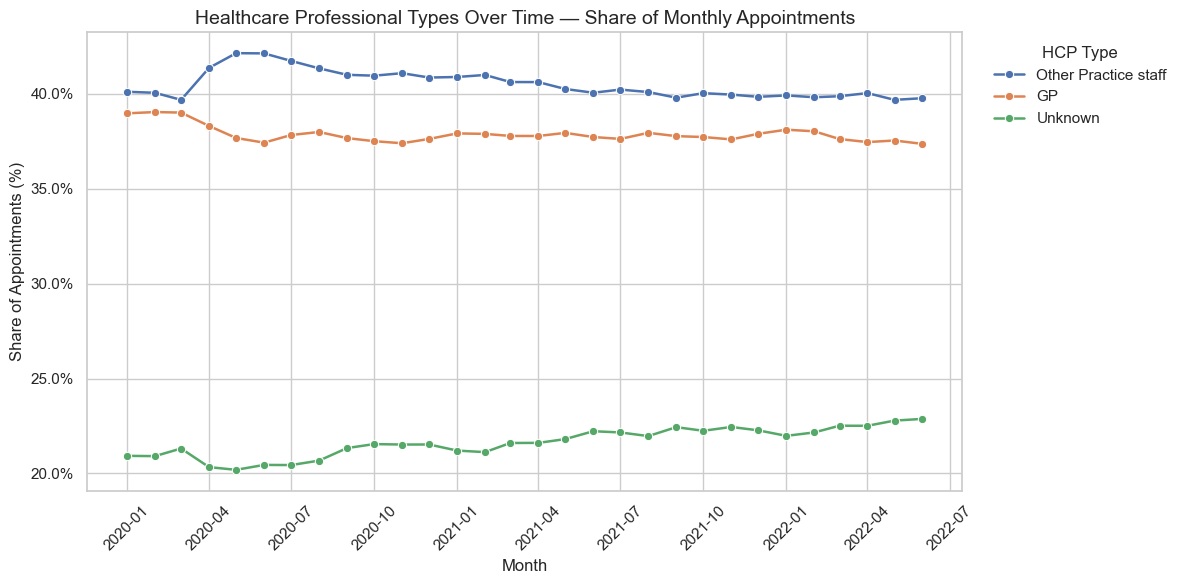

In [194]:
# One-cell robust plot: HCP types over time as % share per month ---

from matplotlib.ticker import PercentFormatter


df = None
for name in ("ar", "nc", "df"):
    if name in globals() and isinstance(globals()[name], pd.DataFrame):
        df = globals()[name]
        break

if df is None:
    raise ValueError(
        "No source DataFrame found. Please ensure one of `ar`, `nc`, or `df` exists."
    )

# 1) Detect columns we need (robustly)
# Month column

month_col = None
if "appointment_month" in df.columns:
    month_col = "appointment_month"
elif "appointment_date" in df.columns:
    month_col = "appointment_date"
else:
    raise ValueError(
        "Neither 'appointment_month' nor 'appointment_date' exists in the data."
    )

# Healthcare professional column
hcp_col = None
candidate_names = [
    "hcp_type", "hcp", "healthcare_professional_type",
    "professional_type", "staff_type", "role", "role_type"
]
for c in candidate_names:
    if c in df.columns:
        hcp_col = c
        break

# Fuzzy fallback (optional)
if hcp_col is None:
    try:
        from difflib import get_close_matches
        match = get_close_matches("hcp_type", df.columns, n=1, cutoff=0.6)
        if match:
            hcp_col = match[0]
    except Exception:
        pass

if hcp_col is None:
    raise ValueError(
        "No healthcare professional column found. Inspect columns and set, e.g.:\n"
        "hcp_col = 'professional_type'"
    )


# 2) Build a plottable month column

s = df[month_col].astype(str).str.strip()

# If we got actual dates (or YYYY-MM) try to parse
dt_try = pd.to_datetime(s, errors="coerce", infer_datetime_format=True)

if dt_try.notna().mean() >= 0.8:
    # Use normalized month start timestamps
    df["_month_for_plot"] = dt_try.dt.to_period("M").dt.to_timestamp()
else:
    # Treat as month names
    s = s.str.capitalize()
    month_order = [
        "January","February","March","April","May","June",
        "July","August","September","October","November","December"
    ]
    df["_month_for_plot"] = pd.Categorical(s, categories=month_order, ordered=True)


# 3) Aggregate -> % share per month

# Clean HCP labels
clean = df.copy()
clean[hcp_col] = (
    clean[hcp_col]
    .astype(str)
    .str.strip()
    .replace({"": "Unknown", "nan": "Unknown", "None": "Unknown"})
)

# Count appointments per (month, hcp)
grp = (
    clean.groupby(["_month_for_plot", hcp_col])
         .size()
         .reset_index(name="count")
)

# If there are many categories, keep Top N and group the rest as "Other"
TOP_N = 7
totals = grp.groupby(hcp_col)["count"].sum().sort_values(ascending=False)
if len(totals) > TOP_N:
    keep = totals.head(TOP_N).index
    grp[hcp_col] = np.where(grp[hcp_col].isin(keep), grp[hcp_col], "Other")
    grp = grp.groupby(["_month_for_plot", hcp_col], as_index=False)["count"].sum()

# Compute % share per month
grp["percentage"] = grp.groupby("_month_for_plot")["count"].transform(
    lambda x: x / x.sum() * 100
)

# Order legend by overall volume; put "Other" last if present
legend_order = grp.groupby(hcp_col)["count"].sum().sort_values(ascending=False).index.tolist()
if "Other" in legend_order:
    legend_order = [t for t in legend_order if t != "Other"] + ["Other"]

# Drop months we couldn't parse (if any)
grp = grp[grp["_month_for_plot"].notna()].copy()


# 4) Plot (clean and readable)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

ax = sns.lineplot(
    data=grp,
    x="_month_for_plot",
    y="percentage",
    hue=hcp_col,
    hue_order=legend_order,
    marker="o",
    linewidth=1.8
)

ax.yaxis.set_major_formatter(PercentFormatter(100))
ax.set_title("Healthcare Professional Types Over Time — Share of Monthly Appointments", fontsize=14)
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Share of Appointments (%)", fontsize=12)
plt.xticks(rotation=45)

# Legend to the right, minimal frame
ax.legend(title="HCP Type", bbox_to_anchor=(1.02, 1), loc="upper left", frameon=False)

plt.tight_layout()


# Save as PNG
plt.savefig("share_monthly_appointments_health_professional_types", dpi=300, bbox_inches="tight")
plt.show()


**Question 3:** Are there significant changes in whether or not visits are attended?

<Figure size 1500x1200 with 0 Axes>

Text(0.5, 1.0, 'Share of Appointment Status Over Time (highlighting largest changes)')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Share of Appointments (%)')

(array([18262., 18353., 18444., 18536., 18628., 18718., 18809., 18901.,
        18993., 19083., 19174.]),
 [Text(18262.0, 0, '2020-01'),
  Text(18353.0, 0, '2020-04'),
  Text(18444.0, 0, '2020-07'),
  Text(18536.0, 0, '2020-10'),
  Text(18628.0, 0, '2021-01'),
  Text(18718.0, 0, '2021-04'),
  Text(18809.0, 0, '2021-07'),
  Text(18901.0, 0, '2021-10'),
  Text(18993.0, 0, '2022-01'),
  Text(19083.0, 0, '2022-04'),
  Text(19174.0, 0, '2022-07')])

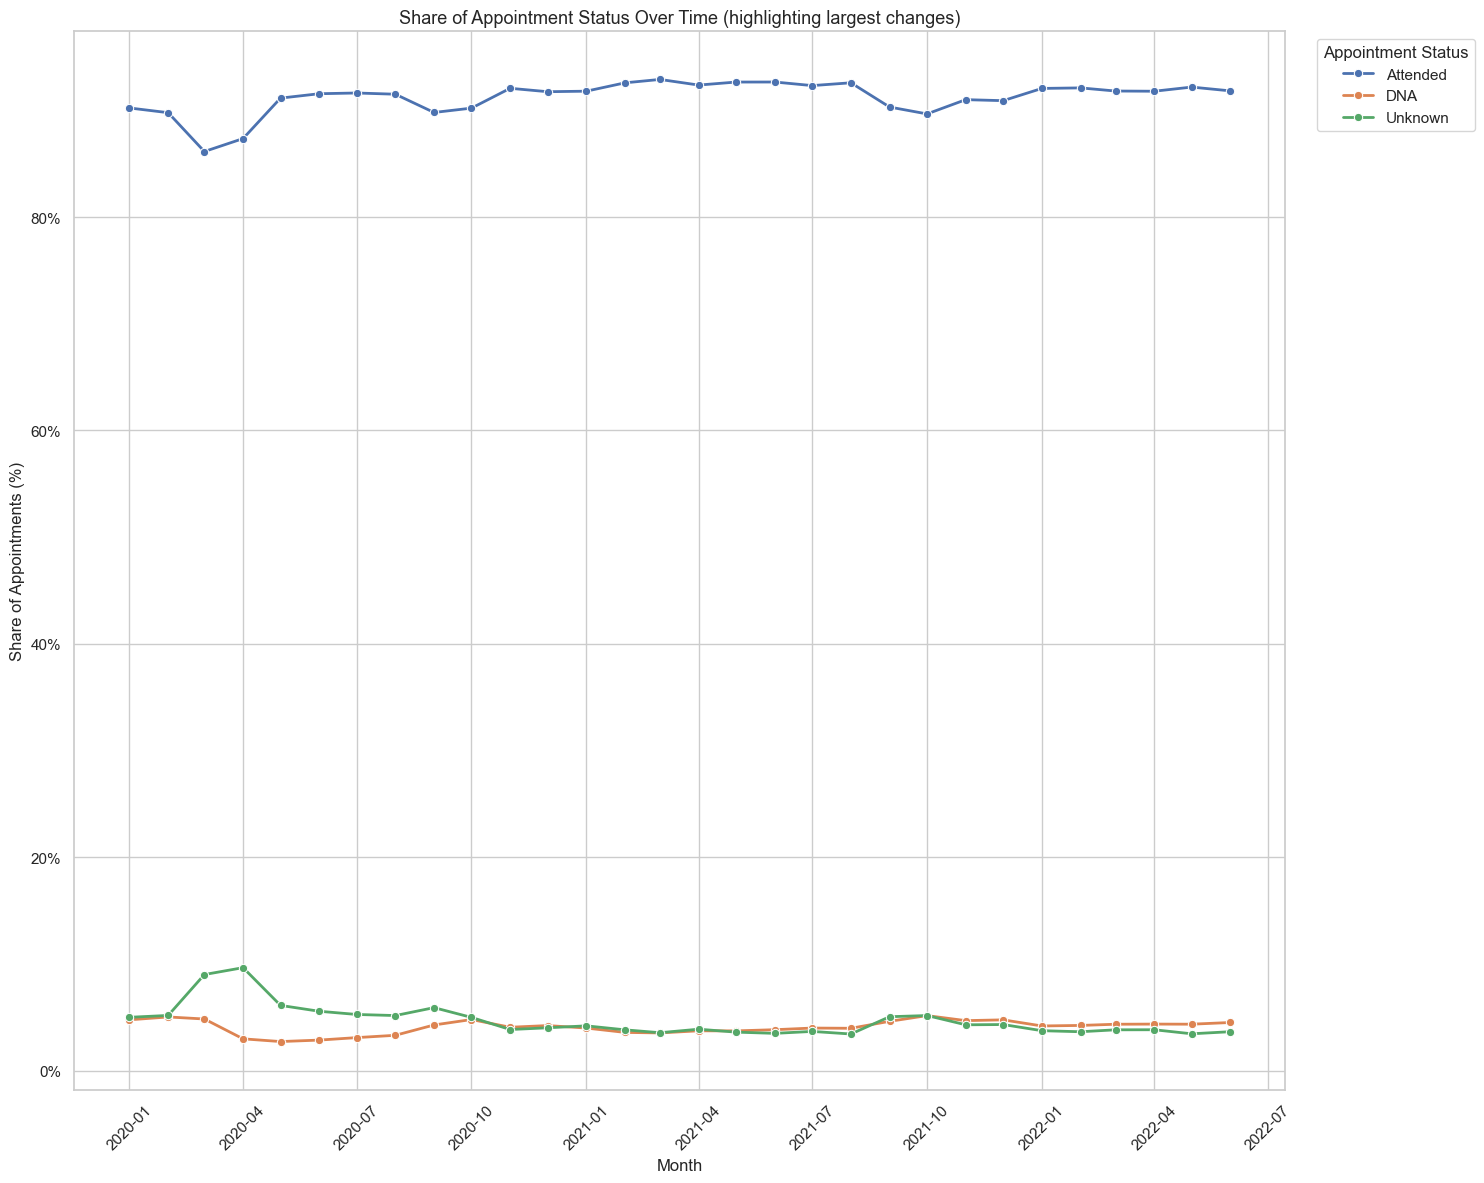

In [196]:

from matplotlib.ticker import PercentFormatter

# Light normalization / column detection
# Count column can be named differently across files
possible_count_cols = ['count_of_appointments', 'appointments', 'num_appointments', 'records', 'count']
count_col = next((c for c in possible_count_cols if c in df.columns), None)
if count_col is None:
    raise ValueError("Couldn't find a count column. Tried: " + ", ".join(possible_count_cols))

# Ensure the needed columns exist
required_cols = {'appointment_month', 'appointment_status'}
missing = required_cols - set(df.columns)
if missing:
    raise ValueError(f"Missing required column(s): {missing}")


# Normalize status text a bit
df['appointment_status'] = df['appointment_status'].astype(str).str.strip()

# Make a proper month column ---
# Accepts values like '2021-08' or real datetimes; coerce anything else to NaT (and drop)
month_dt = pd.to_datetime(df['appointment_month'], errors='coerce')
df = df.loc[~month_dt.isna()].copy()
df['month'] = month_dt.dt.to_period('M').dt.to_timestamp()  # Month start timestamps for plotting

# Aggregate & compute monthly percentages by status ---
monthly_status = (
    df.groupby(['month', 'appointment_status'], as_index=False)[count_col]
      .sum()
      .rename(columns={count_col: 'appointments'})
)
monthly_status['pct'] = monthly_status.groupby('month')['appointments'].transform(
    lambda x: x / x.sum() * 100
)

# Find months with largest changes in "Attended" (fallback to dominant status) ---
pivot = monthly_status.pivot(index='month', columns='appointment_status', values='pct').fillna(0)

if 'Attended' in pivot.columns:
    focus_series = pivot['Attended']
    focus_label = 'Attended'
else:
    # If "Attended" isn't present, use the status with the highest average share
    focus_label = pivot.mean().idxmax()
    focus_series = pivot[focus_label]

change = focus_series.diff().abs()
top_change_months = change.nlargest(3).index  # mark top 3 months with biggest change


# Simple, readable plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,12))

ax = sns.lineplot(
    data=monthly_status,
    x='month', y='pct', hue='appointment_status',
    marker='o', linewidth=2
)



# Format y as %
ax.yaxis.set_major_formatter(PercentFormatter(100))

# Tidy labels & legend
plt.title('Share of Appointment Status Over Time (highlighting largest changes)', fontsize=13)
plt.xlabel('Month')
plt.ylabel('Share of Appointments (%)')
plt.xticks(rotation=45)

# Sort legend by latest-month share (descending) for easier reading
latest = monthly_status['month'].max()
order = (
    monthly_status[monthly_status['month'] == latest]
    .sort_values('pct', ascending=False)['appointment_status']
    .tolist()
)
handles, labels = ax.get_legend_handles_labels()
if 'appointment_status' in labels:
    # remove automatic title in legend entries
    title_idx = labels.index('appointment_status')
    handles = handles[title_idx+1:]
    labels = labels[title_idx+1:]

# Reorder legend if we computed "order"
label_to_handle = {lab: h for lab, h in zip(labels, handles)}
ordered_handles = [label_to_handle[l] for l in order if l in label_to_handle]
ordered_labels  = [l for l in order if l in label_to_handle]

plt.legend(ordered_handles, ordered_labels, title='Appointment Status', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()

# Save as PNG
plt.savefig("share_appointment_status_over_time", dpi=300, bbox_inches="tight")
plt.show()


**Question 4:** Are there changes in terms of appointment type and the busiest months?

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Appointments Over Time by Appointment Type (HCP Type)')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Number of Appointments')

<Figure size 1500x1200 with 0 Axes>

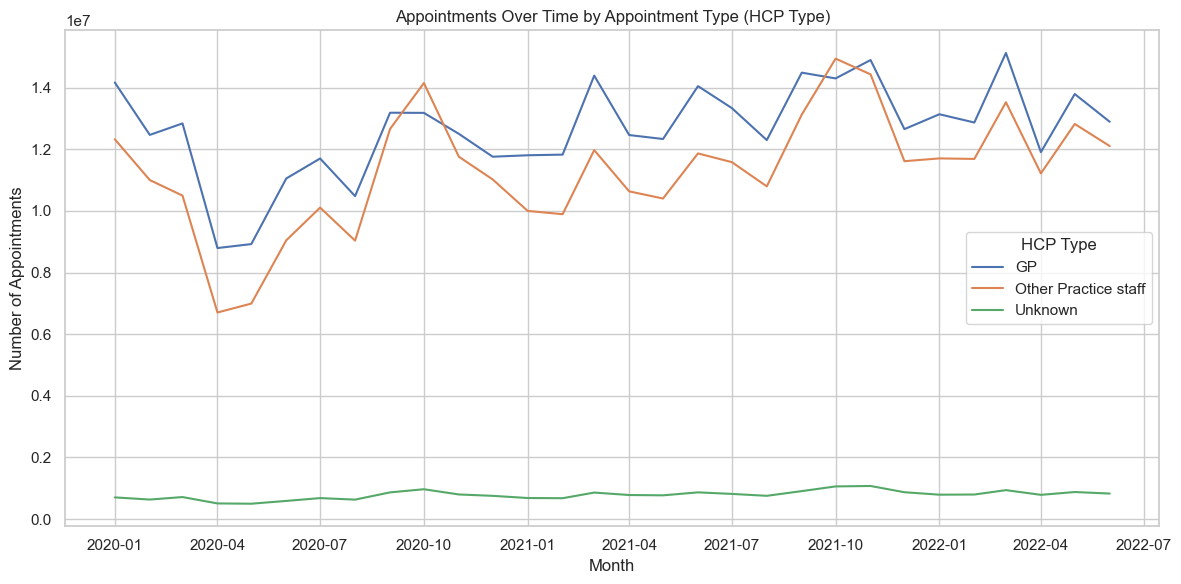

In [203]:

# Standardize column names (remove extra spaces)
df.columns = [c.strip() for c in df.columns]

# Convert appointment_month to datetime
df['appointment_month'] = pd.to_datetime(df['appointment_month'], errors='coerce')

# Drop rows where appointment_month couldn't be parsed
df = df.dropna(subset=['appointment_month'])

# Group by month and healthcare professional type
monthly_counts = (
    df.groupby(['appointment_month', 'hcp_type'])['count_of_appointments']
      .sum()
      .reset_index()
      .sort_values('appointment_month')
)

# Plot: changes over time by appointment type
plt.figure(figsize=(12, 6))
for hcp in monthly_counts['hcp_type'].unique():
    subset = monthly_counts[monthly_counts['hcp_type'] == hcp]
    plt.plot(subset['appointment_month'], subset['count_of_appointments'], label=hcp)

plt.title('Appointments Over Time by Appointment Type (HCP Type)')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.legend(title='HCP Type')
plt.grid(True)
plt.tight_layout()


# Save as PNG
plt.savefig("appointments_months_busiest", dpi=300, bbox_inches="tight")



plt.show()

**Question 5:** Are there any trends in time between booking and appointment?

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Trends in Time Between Booking and Appointment')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Number of Appointments')

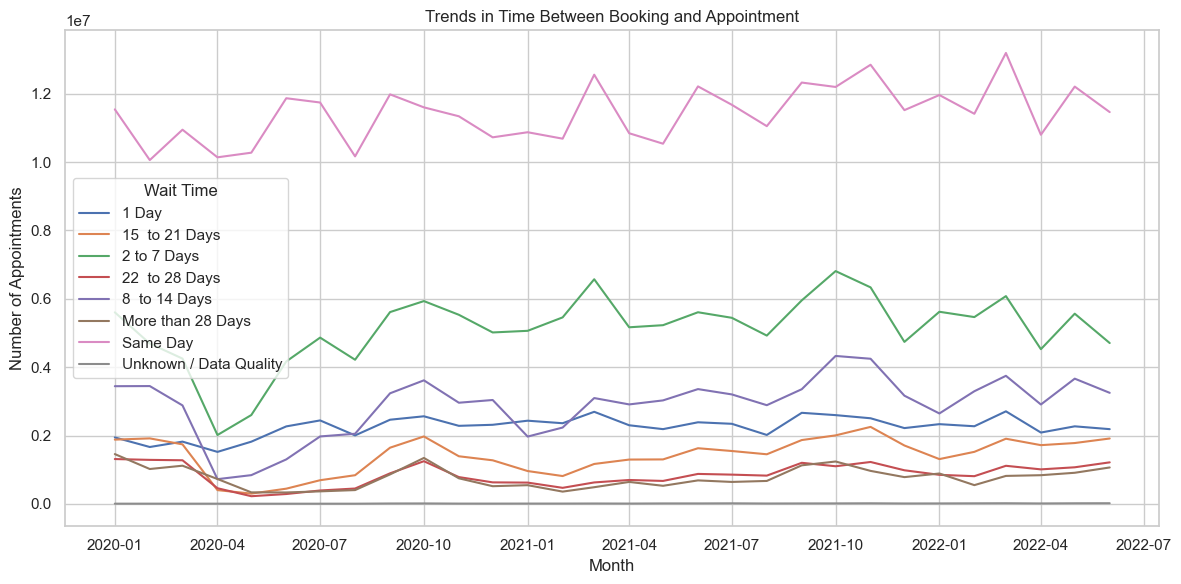

In [204]:

# Standardize column names
df.columns = [c.strip() for c in df.columns]

# Convert appointment_month to datetime
df['appointment_month'] = pd.to_datetime(df['appointment_month'], errors='coerce')
df = df.dropna(subset=['appointment_month'])

# Group by month and time_between_book_and_appointment
wait_time_trends = (
    df.groupby(['appointment_month', 'time_between_book_and_appointment'])['count_of_appointments']
      .sum()
      .reset_index()
      .sort_values('appointment_month')
)

# Plot: trends over time by wait time category
plt.figure(figsize=(12, 6))
for wait_time in wait_time_trends['time_between_book_and_appointment'].unique():
    subset = wait_time_trends[wait_time_trends['time_between_book_and_appointment'] == wait_time]
    plt.plot(subset['appointment_month'], subset['count_of_appointments'], label=wait_time)

plt.title('Trends in Time Between Booking and Appointment')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.legend(title='Wait Time')
plt.grid(True)
plt.tight_layout()


# Save as PNG
plt.savefig("trends_time_booking_appointment", dpi=300, bbox_inches="tight")

plt.show()


**Question 6:** How do the various service settings compare?

Text(0.5, 1.0, 'Appointments by Service Setting — Distribution per Month')

Text(0.5, 0, 'Service setting')

Text(0, 0.5, 'Number of appointments per month')

[None, None, None, None, None, None, None, None, None, None]

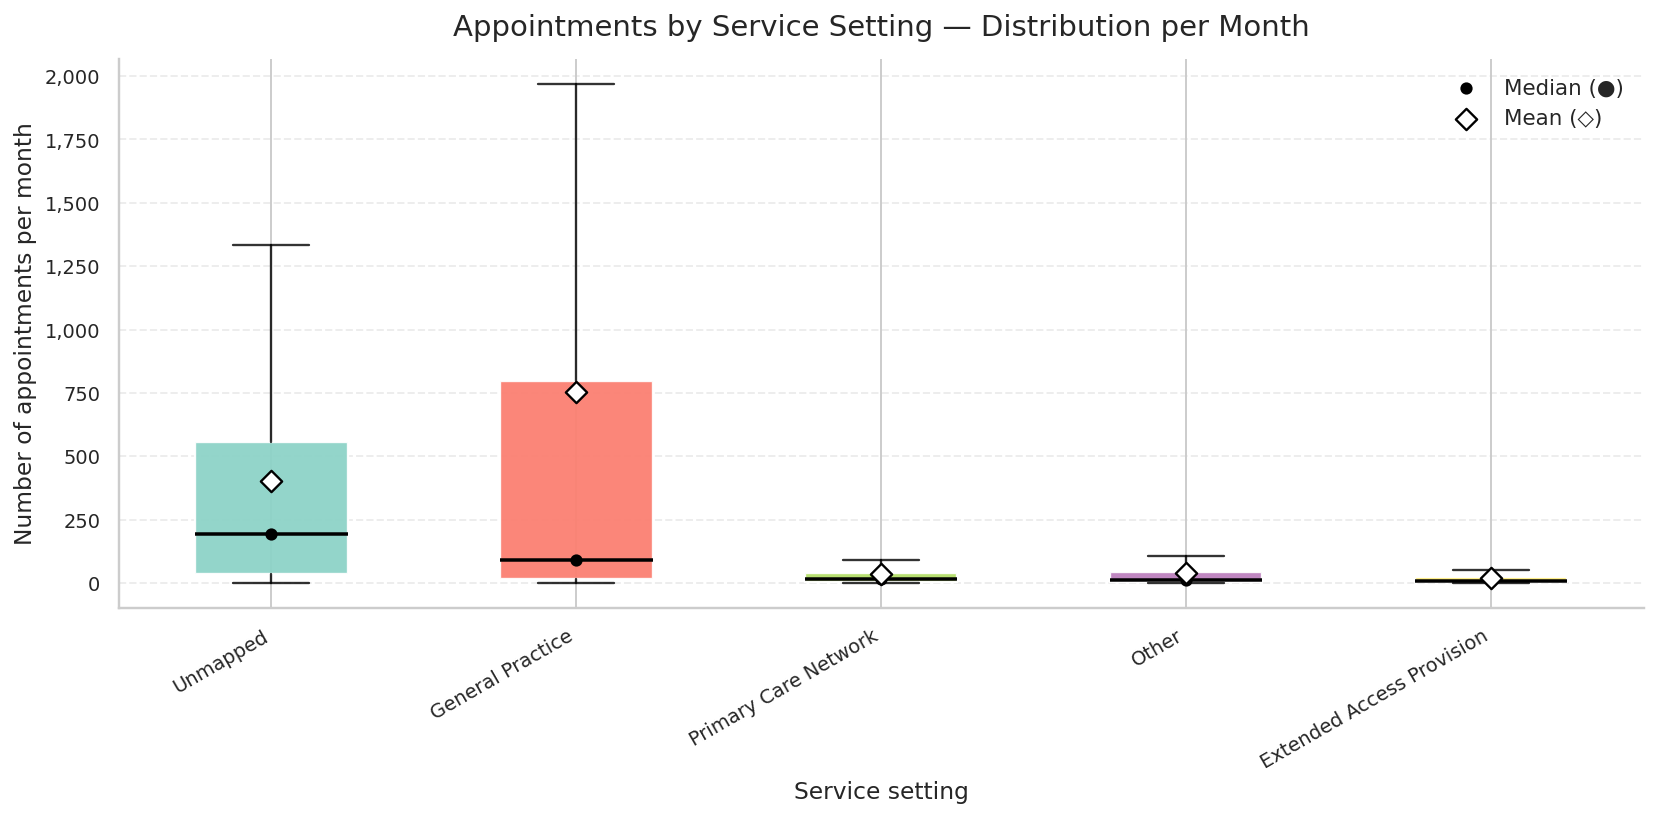

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# ---------- Load & prep ----------
nat = pd.read_excel("national_categories.xlsx")
nat.columns = [c.strip().lower() for c in nat.columns]
service_df = nat[['appointment_month', 'service_setting', 'count_of_appointments']].copy()

# Order categories by median
order = (
    service_df.groupby('service_setting')['count_of_appointments']
              .median()
              .sort_values(ascending=False)
              .index.tolist()
)

# ---------- Style ----------
plt.rcParams.update({
    "figure.dpi": 140,
    "font.family": "DejaVu Sans",
    "axes.titlesize": 15,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "axes.spines.top": False,
    "axes.spines.right": False,
})

def thousands(x, pos):
    return f"{int(x):,}"

# ---------- Create boxplot ----------
cats = order
data = [service_df.loc[service_df['service_setting'] == c, 'count_of_appointments'].dropna().values for c in cats]

cmap = plt.colormaps['Set3']
colors = [cmap(i / max(1, len(cats)-1)) for i in range(len(cats))]

fig, ax = plt.subplots(figsize=(12, 6))

bp = ax.boxplot(
    data,
    patch_artist=True,
    tick_labels=cats,
    showfliers=False,
    medianprops=dict(color='black', linewidth=1.8),
    whiskerprops=dict(linewidth=1.2, alpha=0.8),
    capprops=dict(linewidth=1.2, alpha=0.8),
    boxprops=dict(linewidth=1.2, alpha=0.95)
)

# Color each box
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('white')

# Overlay medians (●) and means (◇)
medians = [np.median(v) if len(v) else np.nan for v in data]
means   = [np.mean(v)   if len(v) else np.nan for v in data]
ax.scatter(range(1, len(cats)+1), medians, s=28, color='black', zorder=4)
ax.scatter(range(1, len(cats)+1), means, s=60, marker='D',
           facecolors='white', edgecolors='black', linewidths=1.2, zorder=5)

# Styling
ax.set_title("Appointments by Service Setting — Distribution per Month", pad=12)
ax.set_xlabel('Service setting')
ax.set_ylabel('Number of appointments per month')
ax.yaxis.set_major_formatter(FuncFormatter(thousands))
ax.grid(axis='y', linestyle='--', alpha=0.35)
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

# Legend
ax.scatter([], [], s=28, color='black', label='Median (●)')
ax.scatter([], [], s=60, marker='D', facecolors='white', edgecolors='black', linewidths=1.2, label='Mean (◇)')
ax.legend(frameon=False, loc='upper right')

plt.tight_layout()

# Save as PNG
plt.savefig("appointments_various_settings", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# ---------- Load & prep ----------
nat = pd.read_excel("national_categories.xlsx")
nat.columns = [c.strip().lower() for c in nat.columns]

service_df = nat[['appointment_month', 'service_setting', 'count_of_appointments']].copy()
service_df['service_setting'] = service_df['service_setting'].astype(str)

# Exclude ANY GP / General Practice variants (case-insensitive, no capture groups)
gp_pattern = r'\bgp\b|\bgeneral\s*practice\b'
mask_gp = service_df['service_setting'].str.lower().str.contains(gp_pattern, regex=True, na=False)
service_df = service_df[~mask_gp].copy()

# Order categories by median
order = (
    service_df.groupby('service_setting')['count_of_appointments']
              .median()
              .sort_values(ascending=False)
              .index.tolist()
)

# ---------- Style ----------
plt.rcParams.update({
    "figure.dpi": 140,
    "font.family": "DejaVu Sans",
    "axes.titlesize": 15,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "axes.spines.top": False,
    "axes.spines.right": False,
})

def thousands(x, pos): return f"{int(x):,}"

# ---------- Create boxplot ----------
cats = order
data = [service_df.loc[service_df['service_setting'] == c, 'count_of_appointments'].dropna().values for c in cats]

cmap = plt.colormaps['Set3']
colors = [cmap(i / max(1, len(cats)-1)) for i in range(len(cats))]

fig, ax = plt.subplots(figsize=(12, 6))
bp = ax.boxplot(
    data,
    patch_artist=True,
    tick_labels=cats,       # Matplotlib 3.9+
    showfliers=False,
    medianprops=dict(color='black', linewidth=1.8),
    whiskerprops=dict(linewidth=1.2, alpha=0.8),
    capprops=dict(linewidth=1.2, alpha=0.8),
    boxprops=dict(linewidth=1.2, alpha=0.95)
)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('white')

medians = [np.median(v) if len(v) else np.nan for v in data]
means   = [np.mean(v)   if len(v) else np.nan for v in data]
ax.scatter(range(1, len(cats)+1), medians, s=28, color='black', zorder=4)
ax.scatter(range(1, len(cats)+1), means, s=60, marker='D',
           facecolors='white', edgecolors='black', linewidths=1.2, zorder=5)

ax.set_title("Appointments by Service Setting — Distribution per Month (Excluding GP)", pad=12)
ax.set_xlabel('Service setting')
ax.set_ylabel('Number of appointments per month')
ax.yaxis.set_major_formatter(FuncFormatter(thousands))
ax.grid(axis='y', linestyle='--', alpha=0.35)
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

ax.scatter([], [], s=28, color='black', label='Median (●)')
ax.scatter([], [], s=60, marker='D', facecolors='white', edgecolors='black', linewidths=1.2, label='Mean (◇)')
ax.legend(frameon=False, loc='upper right')

plt.tight_layout()
plt.show()


<h1 style="font-size:36px;">Additional Data for Analysis</h1>

# 

<Figure size 840x840 with 0 Axes>

<Axes: xlabel='appointment_status', ylabel='icb_ons_code'>

Text(0.5, 1.0, 'Regional Attendance Rate (ICB ONS)')

Text(59.74999999999999, 0.5, '')

Text(0.5, 47.15, '')

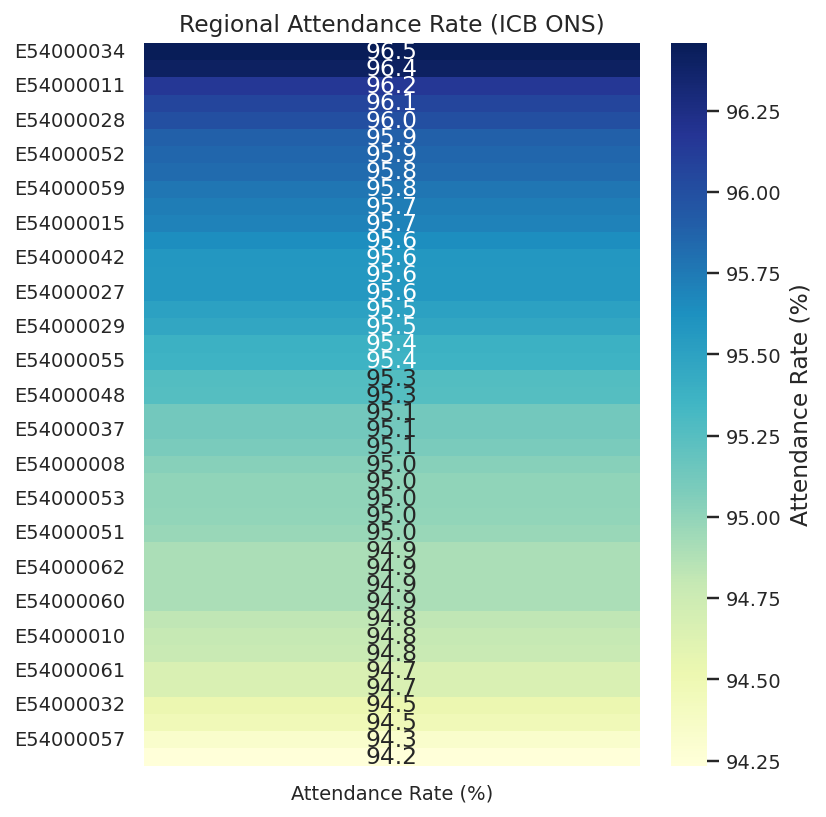

In [217]:
#Additional Regional Data for Analysis
# Load data
df = pd.read_csv("appointments_regional.csv")

# Aggregate attendance rate by ICB
agg = df.groupby(["icb_ons_code", "appointment_status"])["count_of_appointments"].sum().unstack(fill_value=0)
for col in ["Attended", "Did Not Attend", "Unknown"]:
    if col not in agg.columns:
        agg[col] = 0
agg["Total"] = agg[["Attended", "Did Not Attend", "Unknown"]].sum(axis=1)
agg["Attendance Rate (%)"] = (agg["Attended"] / agg["Total"]) * 100

# Sort
agg_sorted = agg.sort_values("Attendance Rate (%)", ascending=False)

# Compact heatmap
plt.figure(figsize=(6, 6))  # smaller figure
sns.heatmap(
    agg_sorted[["Attendance Rate (%)"]],
    annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={"label": "Attendance Rate (%)"}
)
plt.title("Regional Attendance Rate (ICB ONS)", fontsize=12)
plt.ylabel("")
plt.xlabel("")
plt.tight_layout()


# Save as PNG
plt.savefig("regional_attendance_rate", dpi=300, bbox_inches="tight")
plt.show()


### Findings and Recommendations based on the Analysis.

> Double click to insert your summary.

In [221]:
# Create an aggregated data set to review the different features.

ar_booking = ar.groupby(['time_between_book_and_appointment'])[
    ['count_of_appointments']].sum()

# calculate proportion of when appointments are booked
ar_booking['percent'] = ar_booking['count_of_appointments']\
    / ar_booking['count_of_appointments'].sum()

ar_booking_time_sorted = ar_booking.sort_values(
    by='percent', ascending=False)

# View the DataFrame.
ar_booking_time_sorted


,count_of_appointments,percent
time_between_book_and_appointment,,
Same Day,342747171,0.461423
2 to 7 Days,153794531,0.207046
8 to 14 Days,86846519,0.116917
1 Day,67716097,0.091163
15 to 21 Days,42710574,0.057499
22 to 28 Days,25536541,0.034379
More than 28 Days,23050987,0.031032
Unknown / Data Quality,402105,0.000541


In [222]:
#Did not attent df for non-attendance only
ar_DNA = ar[(ar['appointment_status'] == 'DNA')]
ar_DNA

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments,_month_for_plot
69,E54000034,2020-01,DNA,GP,Face-to-Face,1 Day,430,2020-01-01
70,E54000034,2020-01,DNA,GP,Face-to-Face,15 to 21 Days,452,2020-01-01
71,E54000034,2020-01,DNA,GP,Face-to-Face,2 to 7 Days,1249,2020-01-01
72,E54000034,2020-01,DNA,GP,Face-to-Face,22 to 28 Days,276,2020-01-01
73,E54000034,2020-01,DNA,GP,Face-to-Face,8 to 14 Days,797,2020-01-01
...,...,...,...,...,...,...,...,...
596756,E54000050,2022-06,DNA,Unknown,Unknown,2 to 7 Days,8,2022-06-01
596757,E54000050,2022-06,DNA,Unknown,Unknown,22 to 28 Days,1,2022-06-01
596758,E54000050,2022-06,DNA,Unknown,Unknown,8 to 14 Days,7,2022-06-01
596759,E54000050,2022-06,DNA,Unknown,Unknown,More than 28 Days,2,2022-06-01


<Figure size 1960x1120 with 0 Axes>

Text(0.5, 1.0, 'Missed Appointments by Booking Lead Time')

Text(0.5, 0, 'Time Between Booking and Appointment')

Text(0, 0.5, 'Count of Missed Appointments')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '2 to 7 Days'),
  Text(1, 0, '8  to 14 Days'),
  Text(2, 0, 'Same Day'),
  Text(3, 0, '15  to 21 Days'),
  Text(4, 0, '1 Day'),
  Text(5, 0, 'More than 28 Days'),
  Text(6, 0, '22  to 28 Days'),
  Text(7, 0, 'Unknown / Data Quality')])

Text(0, 5, '8,697,476')

Text(0, 5, '6,193,368')

Text(0, 5, '6,052,604')

Text(0, 5, '3,282,752')

Text(0, 5, '2,634,536')

Text(0, 5, '2,036,154')

Text(0, 5, '1,999,990')

Text(0, 5, '14,353')

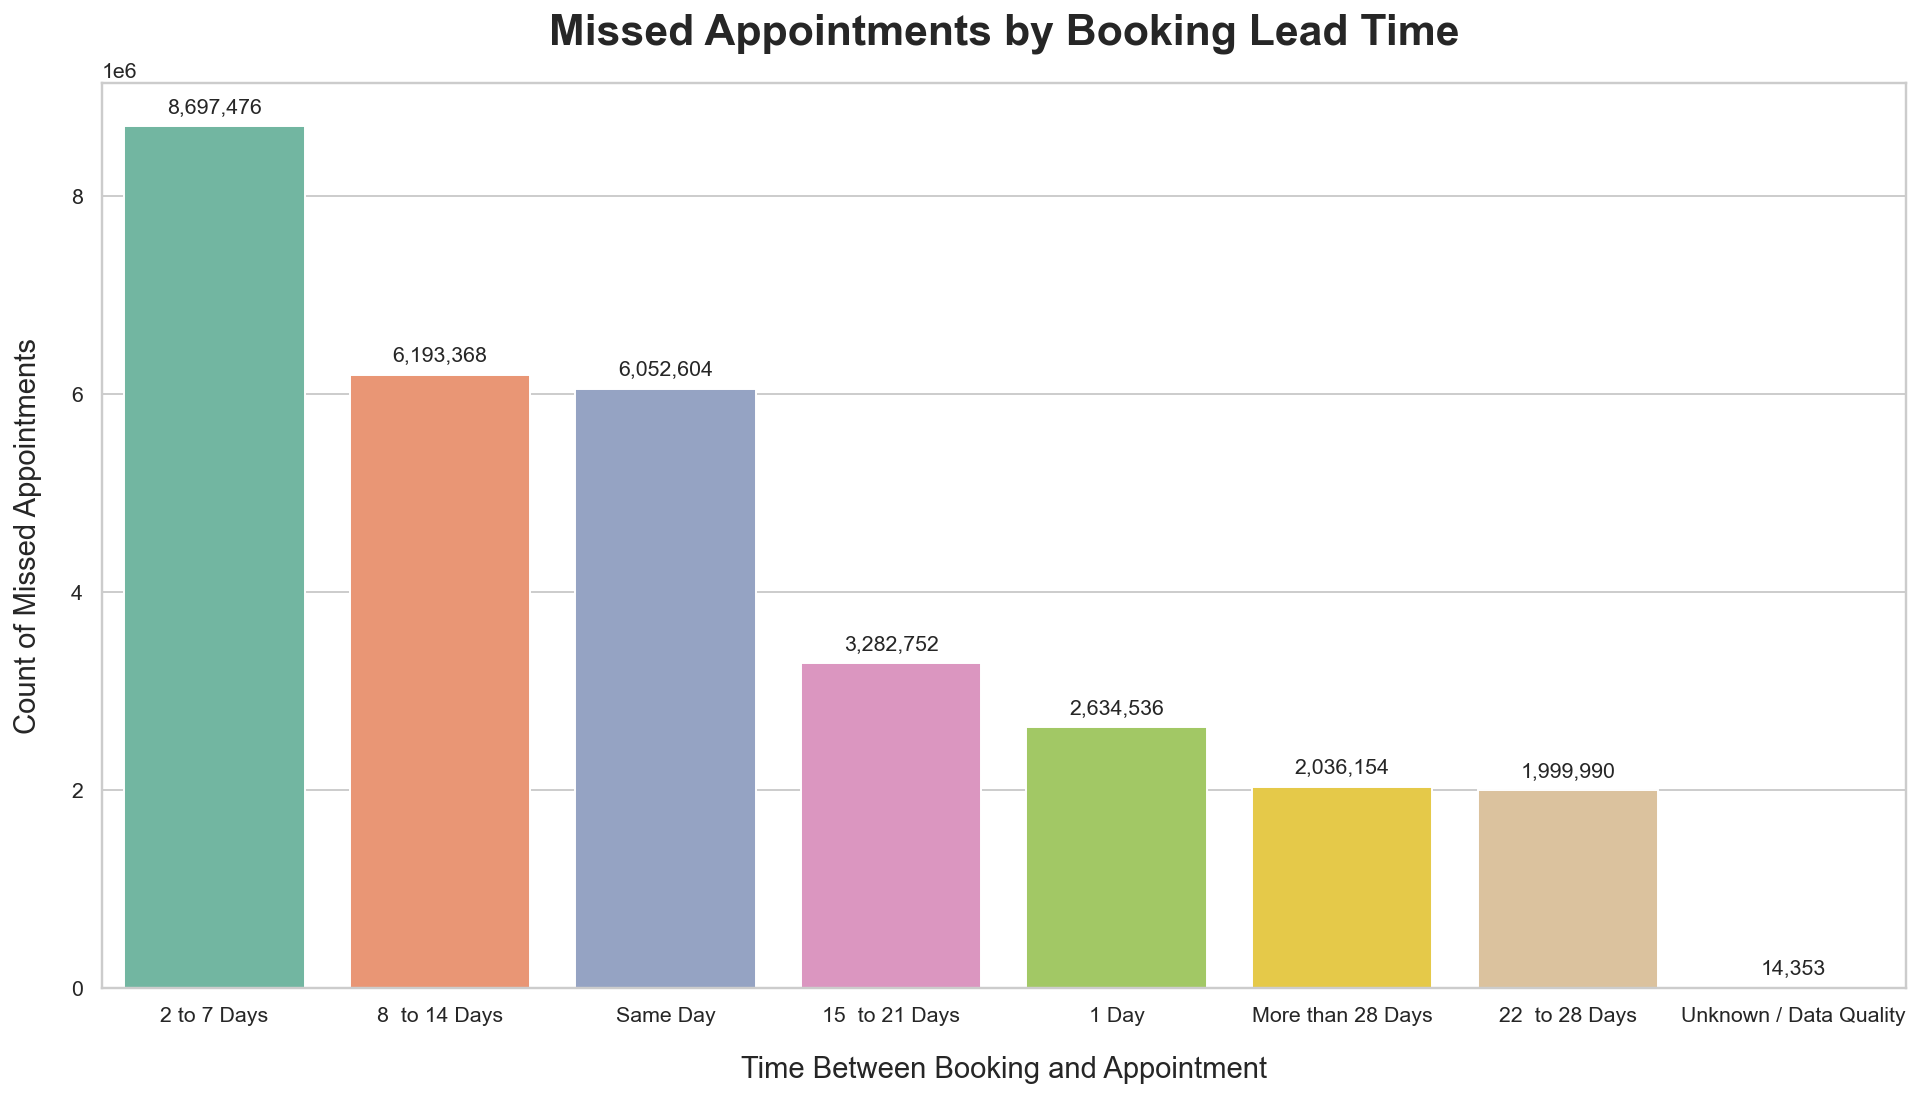

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by booking interval
ar_DNA_booking_time = (
    ar_DNA.groupby(['time_between_book_and_appointment'])[['count_of_appointments']]
    .sum()
    .reset_index()
    .rename(columns={'count_of_appointments': 'count_of_missed_appointments'})
)

# Sort values descending
ar_DNA_booking_time_ordered = ar_DNA_booking_time.sort_values(
    by='count_of_missed_appointments',
    ascending=False
)

# Set style and figure size
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))

# Custom distinct colors
custom_colors = sns.color_palette("Set2", n_colors=len(ar_DNA_booking_time_ordered))

# Barplot with custom colors
ax_DNA = sns.barplot(
    x='time_between_book_and_appointment',
    y='count_of_missed_appointments',
    data=ar_DNA_booking_time_ordered,
    palette=custom_colors
)

# Titles and axis labels
plt.title('Missed Appointments by Booking Lead Time', fontsize=22, pad=20, weight='bold')
ax_DNA.set_xlabel("Time Between Booking and Appointment", fontsize=15, labelpad=15)
ax_DNA.set_ylabel("Count of Missed Appointments", fontsize=15, labelpad=15)

# Keep x labels horizontal
plt.xticks(rotation=0, ha='center')

# Annotate counts on bars
for bar in ax_DNA.patches:
    ax_DNA.annotate(
        format(int(bar.get_height()), ','),
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center', va='bottom',
        fontsize=11,
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.tight_layout()



# Save as PNG
plt.savefig("missed_appointments_booking_lead_time", dpi=300, bbox_inches="tight")

plt.show()


In [100]:
# Determine the total number of appointments per month.
ar_total = ar.groupby(['appointment_month'])[['count_of_appointments']].sum()

ar_total

,count_of_appointments
appointment_month,
2020-01,27199296
2020-02,24104621
2020-03,24053468
2020-04,16007881
2020-05,16417212
2020-06,20690805
2020-07,22491437
2020-08,20150520
2020-09,26714255


In [101]:
 # Determine the total number of appointments per month.
    #total app deep dive: attended, did not attend and unknown
ar_deep = ar.groupby(['appointment_month', 'appointment_status'])[
    ['count_of_appointments']].sum().unstack()
ar_deep

count_of_appointments                  
appointment_status              Attended      DNA  Unknown
appointment_month                                         
2020-01                         24538291  1298269  1362736
2020-02                         21640067  1215154  1249400
2020-03                         20718865  1166314  2168289
2020-04                         13982824   478766  1546291
2020-05                         14962850   449057  1005305
2020-06                         18943022   594382  1153401
2020-07                         20606888   698327  1186222
2020-08                         18438932   669462  1042126
2020-09                         23988492  1145971  1579792
2020-10                         25529275  1358138  1414519
2020-11                         23072059  1021408   968135
2020-12                         21592221   996416   947299
2021-01                         20645718   899833   946518
2021-02                         20736205   804659   858705
2021-03                         25289991   964719   970714
2021-04                         22056413   893723   929796
2021-05                         21779605   878219   850571
2021-06                         24815463  1030367   938352
2021-07                         23761001  1029665   948553
2021-08                         22081765   949137   821269
2021-09                         25757066  1321348  1444087
2021-10                         27170506  1565624  1567704
2021-11                         27667665  1428087  1309318
2021-12                         22853483  1198866  1088427
2022-01                         23597196  1076013   962265
2022-02                         23351939  1076658   926663
2022-03                         27170002  1289888  1135148
2022-04                         21948814  1045455   918791
2022-05                         25343941  1199518   952049
2022-06                         23715317  1167790   944971

In [226]:
# Add a new column to indicate the average utilisation of services.
    #(unknown data ~5% of total)

ar_deep['utilisation%'] = ar_deep[('count_of_appointments', 'Attended')]\
    / (ar_deep[('count_of_appointments', 'Attended')]
       + ar_deep[('count_of_appointments', 'DNA')])
ar_deep

count_of_appointments                   utilisation%  \
appointment_status              Attended      DNA  Unknown                
appointment_month                                                         
2020-01                         24538291  1298269  1362736     0.949751   
2020-02                         21640067  1215154  1249400     0.946833   
2020-03                         20718865  1166314  2168289     0.946708   
2020-04                         13982824   478766  1546291     0.966894   
2020-05                         14962850   449057  1005305     0.970863   
2020-06                         18943022   594382  1153401     0.969577   
2020-07                         20606888   698327  1186222     0.967223   
2020-08                         18438932   669462  1042126     0.964965   
2020-09                         23988492  1145971  1579792     0.954406   
2020-10                         25529275  1358138  1414519     0.949488   
2020-11                         23072059  1021408   968135     0.957606   
2020-12                         21592221   996416   947299     0.955889   
2021-01                         20645718   899833   946518     0.958236   
2021-02                         20736205   804659   858705     0.962645   
2021-03                         25289991   964719   970714     0.963255   
2021-04                         22056413   893723   929796     0.961058   
2021-05                         21779605   878219   850571     0.961240   
2021-06                         24815463  1030367   938352     0.960134   
2021-07                         23761001  1029665   948553     0.958466   
2021-08                         22081765   949137   821269     0.958789   
2021-09                         25757066  1321348  1444087     0.951203   
2021-10                         27170506  1565624  1567704     0.945517   
2021-11                         27667665  1428087  1309318     0.950918   
2021-12                         22853483  1198866  1088427     0.950156   
2022-01                         23597196  1076013   962265     0.956389   
2022-02                         23351939  1076658   926663     0.955926   
2022-03                         27170002  1289888  1135148     0.954677   
2022-04                         21948814  1045455   918791     0.954534   
2022-05                         25343941  1199518   952049     0.954809   
2022-06                         23715317  1167790   944971     0.953069   

                   daily_attendance  
appointment_status                   
appointment_month                    
2020-01                    817943.0  
2020-02                    721336.0  
2020-03                    690629.0  
2020-04                    466094.0  
2020-05                    498762.0  
2020-06                    631434.0  
2020-07                    686896.0  
2020-08                    614631.0  
2020-09                    799616.0  
2020-10                    850976.0  
2020-11                    769069.0  
2020-12                    719741.0  
2021-01                    688191.0  
2021-02                    691207.0  
2021-03                    843000.0  
2021-04                    735214.0  
2021-05                    725987.0  
2021-06                    827182.0  
2021-07                    792033.0  
2021-08                    736059.0  
2021-09                    858569.0  
2021-10                    905684.0  
2021-11                    922256.0  
2021-12                    761783.0  
2022-01                    786573.0  
2022-02                    778398.0  
2022-03                    905667.0  
2022-04                    731627.0  
2022-05                    844798.0  
2022-06                    790511.0

In [227]:
# Monthly aggregate / 30 to get to a daily value.
ar_deep['daily_attendance'] = (
    ar_deep[('count_of_appointments', 'Attended')]/30).round()

# View the DataFrame.
ar_deep
# we cannot reach a firm conclusion on whether or not staffing levels should be increased based on this output.

count_of_appointments                   utilisation%  \
appointment_status              Attended      DNA  Unknown                
appointment_month                                                         
2020-01                         24538291  1298269  1362736     0.949751   
2020-02                         21640067  1215154  1249400     0.946833   
2020-03                         20718865  1166314  2168289     0.946708   
2020-04                         13982824   478766  1546291     0.966894   
2020-05                         14962850   449057  1005305     0.970863   
2020-06                         18943022   594382  1153401     0.969577   
2020-07                         20606888   698327  1186222     0.967223   
2020-08                         18438932   669462  1042126     0.964965   
2020-09                         23988492  1145971  1579792     0.954406   
2020-10                         25529275  1358138  1414519     0.949488   
2020-11                         23072059  1021408   968135     0.957606   
2020-12                         21592221   996416   947299     0.955889   
2021-01                         20645718   899833   946518     0.958236   
2021-02                         20736205   804659   858705     0.962645   
2021-03                         25289991   964719   970714     0.963255   
2021-04                         22056413   893723   929796     0.961058   
2021-05                         21779605   878219   850571     0.961240   
2021-06                         24815463  1030367   938352     0.960134   
2021-07                         23761001  1029665   948553     0.958466   
2021-08                         22081765   949137   821269     0.958789   
2021-09                         25757066  1321348  1444087     0.951203   
2021-10                         27170506  1565624  1567704     0.945517   
2021-11                         27667665  1428087  1309318     0.950918   
2021-12                         22853483  1198866  1088427     0.950156   
2022-01                         23597196  1076013   962265     0.956389   
2022-02                         23351939  1076658   926663     0.955926   
2022-03                         27170002  1289888  1135148     0.954677   
2022-04                         21948814  1045455   918791     0.954534   
2022-05                         25343941  1199518   952049     0.954809   
2022-06                         23715317  1167790   944971     0.953069   

                   daily_attendance  
appointment_status                   
appointment_month                    
2020-01                    817943.0  
2020-02                    721336.0  
2020-03                    690629.0  
2020-04                    466094.0  
2020-05                    498762.0  
2020-06                    631434.0  
2020-07                    686896.0  
2020-08                    614631.0  
2020-09                    799616.0  
2020-10                    850976.0  
2020-11                    769069.0  
2020-12                    719741.0  
2021-01                    688191.0  
2021-02                    691207.0  
2021-03                    843000.0  
2021-04                    735214.0  
2021-05                    725987.0  
2021-06                    827182.0  
2021-07                    792033.0  
2021-08                    736059.0  
2021-09                    858569.0  
2021-10                    905684.0  
2021-11                    922256.0  
2021-12                    761783.0  
2022-01                    786573.0  
2022-02                    778398.0  
2022-03                    905667.0  
2022-04                    731627.0  
2022-05                    844798.0  
2022-06                    790511.0

In [228]:
# Plot sum of count of monthly visits.
# Convert the appointment_month to string data type for ease of visualisation.
ar['appointment_month'] = ar['appointment_month'].astype(str)

    #specify mode is home visit
ar_hv = ar[(ar['appointment_mode'] == 'Home Visit')]
ar_hv_by_month = ar_hv.groupby(['appointment_month'])[
    ['count_of_appointments']].sum()

# renameing columns for clarity
ar_hv_by_month = ar_hv_by_month.rename(
    columns={'count_of_appointments': 'count_of_home_visit_appointments'})
ar_hv_by_month.reset_index()

,appointment_month,count_of_home_visit_appointments
0,2020-01,266942
1,2020-02,227935
2,2020-03,172773
3,2020-04,100673
4,2020-05,112018
5,2020-06,133805
6,2020-07,140787
7,2020-08,119250
8,2020-09,148978
9,2020-10,161721


In [229]:
# Create a lineplot with Seaborn.
fig1, ax1 = plt.subplots(figsize=(20, 10))

sns.lineplot(x='appointment_month',
             y='count_of_home_visit_appointments',
             data=ar_hv_by_month)\
    .set_title("Montly Total Home Visits ", fontsize=25)
plt.xticks(rotation=45)
ax1.set_xlabel("Appointment month", fontsize=15)
plt.axvline(x='2020-03', color='r', linestyle='--')
ax1.annotate('Lockdown', ('2020-03', 175000), fontsize=15)

Text(0.5, 1.0, 'Montly Total Home Visits ')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, '2020-01'),
  Text(1, 0, '2020-02'),
  Text(2, 0, '2020-03'),
  Text(3, 0, '2020-04'),
  Text(4, 0, '2020-05'),
  Text(5, 0, '2020-06'),
  Text(6, 0, '2020-07'),
  Text(7, 0, '2020-08'),
  Text(8, 0, '2020-09'),
  Text(9, 0, '2020-10'),
  Text(10, 0, '2020-11'),
  Text(11, 0, '2020-12'),
  Text(12, 0, '2021-01'),
  Text(13, 0, '2021-02'),
  Text(14, 0, '2021-03'),
  Text(15, 0, '2021-04'),
  Text(16, 0, '2021-05'),
  Text(17, 0, '2021-06'),
  Text(18, 0, '2021-07'),
  Text(19, 0, '2021-08'),
  Text(20, 0, '2021-09'),
  Text(21, 0, '2021-10'),
  Text(22, 0, '2021-11'),
  Text(23, 0, '2021-12'),
  Text(24, 0, '2022-01'),
  Text(25, 0, '2022-02'),
  Text(26, 0, '2022-03'),
  Text(27, 0, '2022-04'),
  Text(28, 0, '2022-05'),
  Text(29, 0, '2022-06')])

Text(0.5, 0, 'Appointment month')

Text(2020-03, 175000, 'Lockdown')

Text(0.5, 1.0, 'Monthly capacity utilisation')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, '2020-01'),
  Text(1, 0, '2020-02'),
  Text(2, 0, '2020-03'),
  Text(3, 0, '2020-04'),
  Text(4, 0, '2020-05'),
  Text(5, 0, '2020-06'),
  Text(6, 0, '2020-07'),
  Text(7, 0, '2020-08'),
  Text(8, 0, '2020-09'),
  Text(9, 0, '2020-10'),
  Text(10, 0, '2020-11'),
  Text(11, 0, '2020-12'),
  Text(12, 0, '2021-01'),
  Text(13, 0, '2021-02'),
  Text(14, 0, '2021-03'),
  Text(15, 0, '2021-04'),
  Text(16, 0, '2021-05'),
  Text(17, 0, '2021-06'),
  Text(18, 0, '2021-07'),
  Text(19, 0, '2021-08'),
  Text(20, 0, '2021-09'),
  Text(21, 0, '2021-10'),
  Text(22, 0, '2021-11'),
  Text(23, 0, '2021-12'),
  Text(24, 0, '2022-01'),
  Text(25, 0, '2022-02'),
  Text(26, 0, '2022-03'),
  Text(27, 0, '2022-04'),
  Text(28, 0, '2022-05'),
  Text(29, 0, '2022-06')])

(0.9, 1.0)

Text(0.5, 0, 'Appointment month')

Text(0, 0.5, 'Utilisation percentage as % ')

Text(2020-03, 0.945, 'Lockdown')

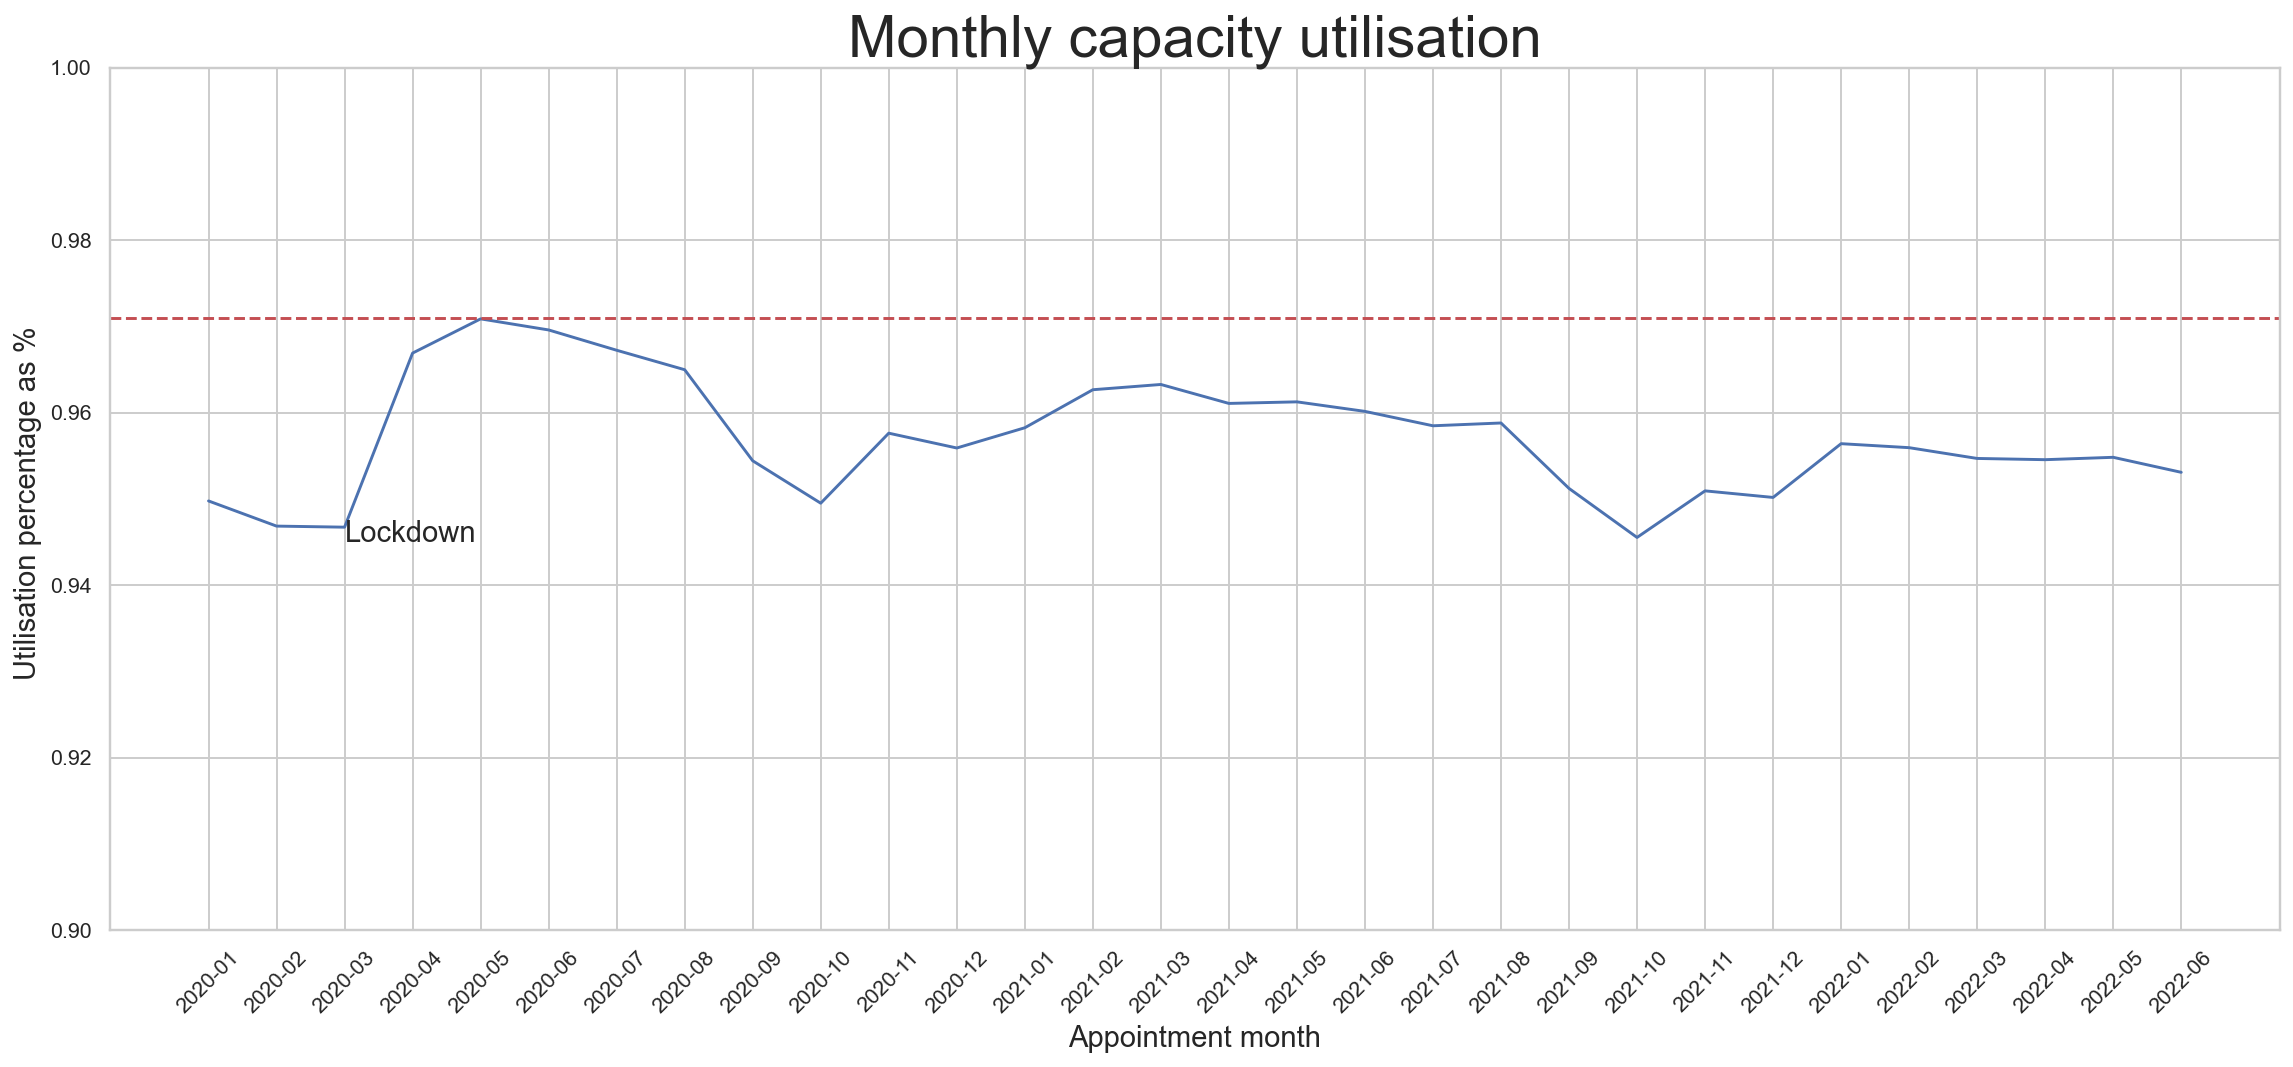

In [231]:
# Plot monthly capacity utilisation.
# Create a lineplot.
fig2, ax2 = plt.subplots(figsize=(20, 8))

sns.lineplot(x='appointment_month',
             y='utilisation%',
             data=ar_deep)\
    .set_title("Monthly capacity utilisation", fontsize=30)
plt.xticks(rotation=45)
ax2.set_ylim([0.9, 1])
ax2.set_xlabel("Appointment month", fontsize=15)
ax2.set_ylabel("Utilisation percentage as % ", fontsize=15)
plt.axhline(y=0.971, color='r', linestyle='--')
ax2.annotate('Lockdown', ('2020-03',0.945 ), fontsize=15)


# Save as PNG
plt.savefig("monthly_capacity_utilisation", dpi=300, bbox_inches="tight")

plt.show()

In [116]:
# Create a line plot to answer the question.
    #First,creating subsets by appointment type:
    
        #Face to Face

ar_face_to_face = ar[ar['appointment_mode'] == 'Face-to-Face']\
    .groupby('appointment_month')[['count_of_appointments']]\
    .sum().reset_index()
ar_face_to_face = ar_face_to_face.rename(
    columns={'count_of_appointments': 'Face-to-Face'})

        #homevisits
ar_home_visits = ar[ar['appointment_mode'] == 'Home Visit']\
    .groupby('appointment_month')[['count_of_appointments']]\
    .sum().reset_index()
ar_home_visits = ar_home_visits.rename(
    columns={'count_of_appointments': 'home_visits'})

        #Telephone
ar_telephone = ar[ar['appointment_mode'] == 'Telephone']\
    .groupby('appointment_month')[['count_of_appointments']]\
    .sum().reset_index()
ar_telephone = ar_telephone.rename(
    columns={'count_of_appointments': 'Telephone'})
    
        #Video
ar_video = ar[ar['appointment_mode'] == 'Video/Online']\
    .groupby('appointment_month')[['count_of_appointments']]\
    .sum().reset_index()
ar_video = ar_video.rename(columns={'count_of_appointments': 'Video'})

        #Did not Attent
ar_DNA = ar[ar['appointment_status'] == 'DNA']\
    .groupby('appointment_month')[['count_of_appointments']]\
    .sum().reset_index()
ar_DNA = ar_DNA.rename(columns={'count_of_appointments': 'not_attended_appts'})

In [118]:

ar_video.head()
ar_telephone.head()
ar_home_visits.head()
ar_face_to_face.head()

,appointment_month,Face-to-Face
0,2020-01,21733394
1,2020-02,19230573
2,2020-03,15921794
3,2020-04,7480941
4,2020-05,7729597


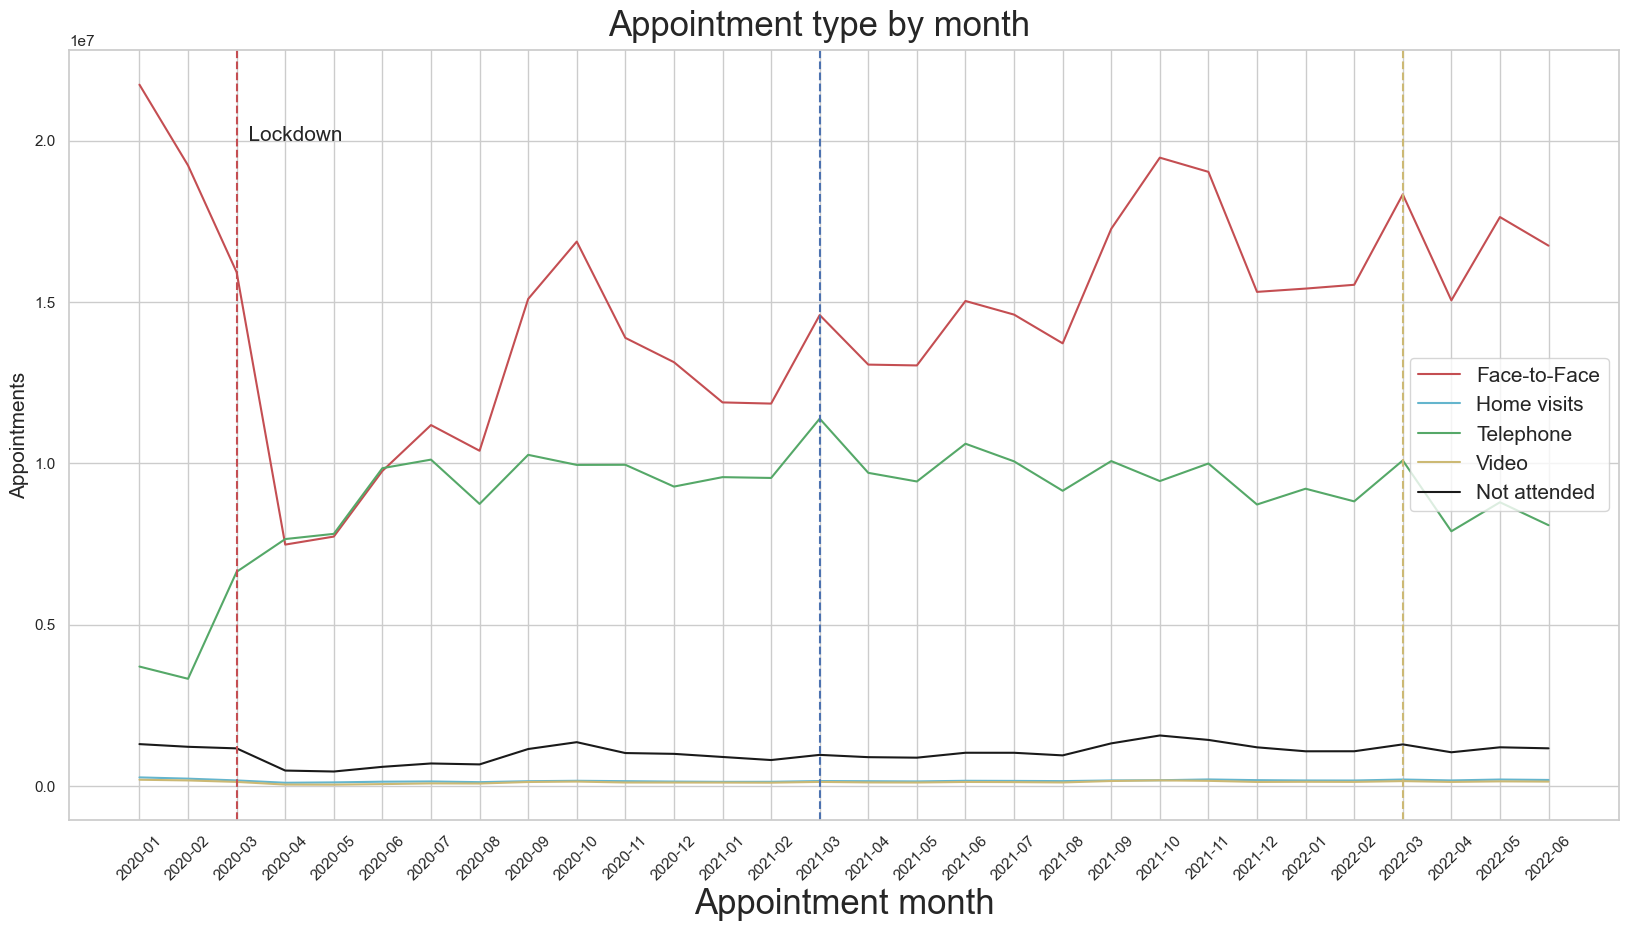

In [119]:
# Create a line plot to answer the question.
fig6, ax6 = plt.subplots(figsize=(20, 10))

ax6.plot(ar_face_to_face['appointment_month'],
         ar_face_to_face['Face-to-Face'], "r")
ax6.plot(ar_home_visits['appointment_month'],
         ar_home_visits['home_visits'], "c")
ax6.plot(ar_telephone['appointment_month'], ar_telephone['Telephone'], "g")
ax6.plot(ar_video['appointment_month'], ar_video['Video'], "y")
ax6.plot(ar_DNA['appointment_month'], ar_DNA['not_attended_appts'], "k")
ax6.tick_params(axis='x', labelrotation=45)
ax6.legend(['Face-to-Face', 'Home visits', 'Telephone',
           'Video', 'Not attended'], loc=5, fontsize=15)
ax6.axvline(x='2020-03', color='r', linestyle='--')
ax6.annotate('  Lockdown', ('2020-03', 20000000), fontsize=15)
fig6.suptitle("Appointment type by month", fontsize=25, y=0.92)
ax6.set_xlabel("Appointment month", fontsize=25)
ax6.set_ylabel("Appointments", fontsize=15)
ax6.axvline(x='2021-03', color='b', linestyle='--')
ax6.axvline(x='2022-03', color='y', linestyle='--')

<h1 style="font-size:36px;">Summary of Findings and Analysis</h1>

Staffing levels have been stable, with GPs and other practice staff now handling a similar share of appointments. Services were delivered across multiple settings — mainly General Practice, plus Primary Care Networks and Extended Access — reducing dependence on any single channel.

The system ran at very high capacity, with 94–97% of available slots filled and over 94% of appointments attended. Most care was a mix of routine and urgent needs, and appointment volumes followed seasonal patterns without leaving capacity unused.

The main gap was missed appointments booked 2–7 days in advance. Reducing these through reminders or better scheduling could create extra capacity and provide a small buffer in a system already operating close to full stretch.


Full detailed explanation on Technical Report. 